# Contents

## Business Understanding

### 1. Overview
### 2. Dataset
### 3. Business Context

## Data Understanding

## Exploratory Data Analysis (EDA)
1. Check for zero Values in numerical features
2. Check for zero values in categoraial feature
3. Check for duplicates
4. Check for unique
5. Check for outliers
6. Check for missing data

## Data Preparation
1. Drop, Fill & Convert
2. Log Transformation for outlier
3. Applying PCA for removing outliers
4. Data Preparation Summary

## Modeling
1. Classification Models (KNN, LogisticRegression, Decision Trees and SVM )

## Evaluation

1. Accuracy, Precision, Recall, F1-score, ROC-AUC 

## Deployment

1. Compare methods and Evaluation performance matrix

## Business Understanding

### Overview
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Link : https://archive.ics.uci.edu/ml/datasets/bank+marketing

- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
- The classification goal is to predict if the client will subscribe a term deposit ('yes') or not ('no').

### Dataset
There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Business Context
- Key Factors influences direct Bank Markerting via phone calls are
- Consumer values in used Cars.



In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from matplotlib.colors import ListedColormap


#1. Dataset understanding: bank-additional-full

In [109]:
dataAdditionalFull = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [110]:
dataAdditionalFull.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [111]:
dataAdditionalFull.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [112]:
dataAdditionalFull.shape

(41188, 21)

In [113]:
dataAdditionalFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [114]:
dataAdditionalFull.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

**Dataset Description:**


*   **Source:** The dataset originates from a Portuguese banking institution's direct marketing campaigns involving phone calls.
*   **Purpose:** The primary goal is to predict whether a customer will subscribe to a term deposit (a type of savings account).
*   **Size:** It contains 41,188 examples (rows) and 20 input features (columns).
*   **Ordering:** The data is ordered chronologically, starting from May 2008 to November 2010.
*   **Target Variable:** The target variable is 'y', which indicates whether a client subscribed to a term deposit ('yes' or 'no').



**Key Features:**



*   **Demographics:**  Likely features like age, job, marital status, education level.
*   **Socioeconomic:** Features like housing loan, personal loan, employment status.
*   **Campaign Information:**  Details about the campaign, like the number of contacts performed during this campaign, duration of the last contact.
*   **Previous Contact:** Information on past contacts with the client, like the number of contacts performed before this campaign.
*   **Other Factors:**  Potentially, features like contact communication type, month of the year, day of the week.


**Potential Challenges:**



*   **Imbalanced Data:**  It's possible that the number of clients who subscribe to a term deposit is considerably lower compared to those who don't. This can affect model performance and may require techniques to address class imbalance.
*   **Feature Engineering:** Some features may need transformation or combination to extract more relevant information for the prediction task.
*   **Model Selection:**  Selecting the appropriate machine learning model that can effectively handle the data and produce accurate predictions.


# 2. Dataset understanding: bank-additional

In [8]:
dataAdditional = pd.read_csv('data/bank-additional.csv', sep=';')

In [9]:
dataAdditional.head()


age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [10]:
dataAdditional.tail()

age         job  marital    education default housing loan    contact  \
4114   30      admin.  married     basic.6y      no     yes  yes   cellular   
4115   39      admin.  married  high.school      no     yes   no  telephone   
4116   27     student   single  high.school      no      no   no   cellular   
4117   58      admin.  married  high.school      no      no   no   cellular   
4118   34  management   single  high.school      no     yes   no   cellular   

     month day_of_week  ...  campaign  pdays  previous     poutcome  \
4114   jul         thu  ...         1    999         0  nonexistent   
4115   jul         fri  ...         1    999         0  nonexistent   
4116   may         mon  ...         2    999         1      failure   
4117   aug         fri  ...         1    999         0  nonexistent   
4118   nov         wed  ...         1    999         0  nonexistent   

     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
4114          1.4          93.918          -42.7      4.958       5228.1  no  
4115          1.4          93.918          -42.7      4.959       5228.1  no  
4116         -1.8          92.893          -46.2      1.354       5099.1  no  
4117          1.4          93.444          -36.1      4.966       5228.1  no  
4118         -0.1          93.200          -42.0      4.120       5195.8  no  

[5 rows x 21 columns]

In [11]:
dataAdditional.shape


(4119, 21)

In [12]:
dataAdditional.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [13]:
dataAdditional.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

# 3. Dataset understanding: bank-full data (older version)

In [14]:
dataBankFull = pd.read_csv('data/bank-full.csv', sep=';')


In [15]:
dataBankFull.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [16]:
dataBankFull.tail()


age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [17]:
dataBankFull.shape


(45211, 17)

In [18]:
dataBankFull.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
dataBankFull.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

# 3. Dataset understanding: bank data 10% (older version)

In [20]:
dataBank = pd.read_csv('data/bank.csv', sep=';')

In [21]:
dataBank.head()


age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [22]:
dataBank.tail()


age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

In [23]:
dataBank.shape


(4521, 17)

In [24]:
dataBank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [25]:
dataBank.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

### Observations
* 1. The datasets contain various attributes related to client information and campaign results.
* 2. Checking for missing values revealed that there are no missing values in either dataset.
* 3. Summary statistics provide an overview of numerical columns, including mean, median, and standard deviation.

# 5. Data Exploration using Bank-additiona-full data

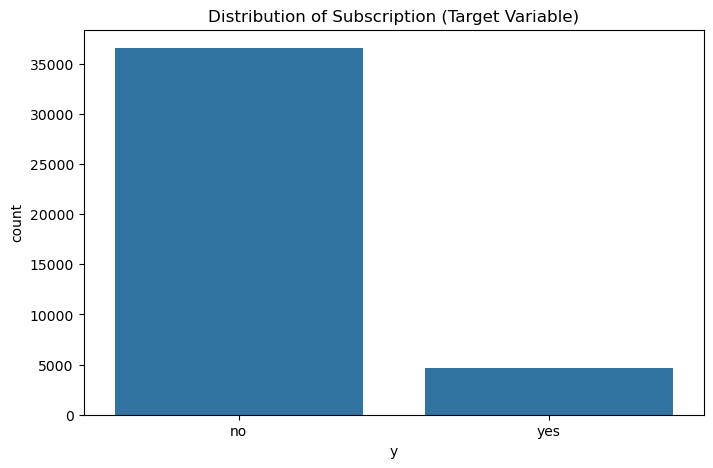

In [26]:

### Univariate Analysis
# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(data=dataAdditionalFull, x='y')
plt.title('Distribution of Subscription (Target Variable)')
plt.savefig('images/targetDistribution.png')
plt.show()



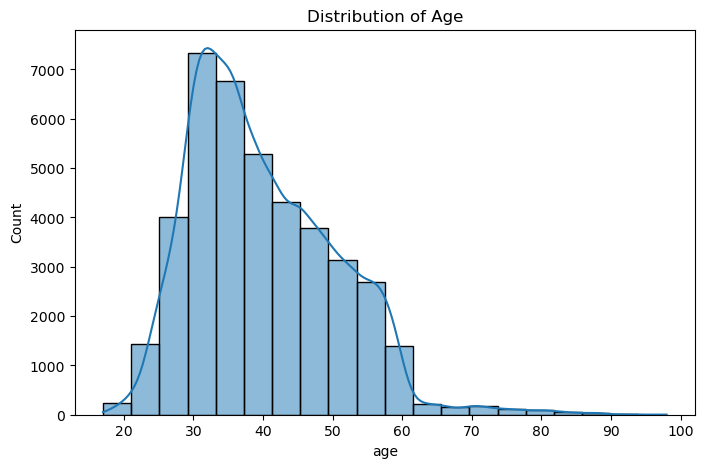

In [27]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data=dataAdditionalFull, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.savefig('images/ageDistribution.png')
plt.show()



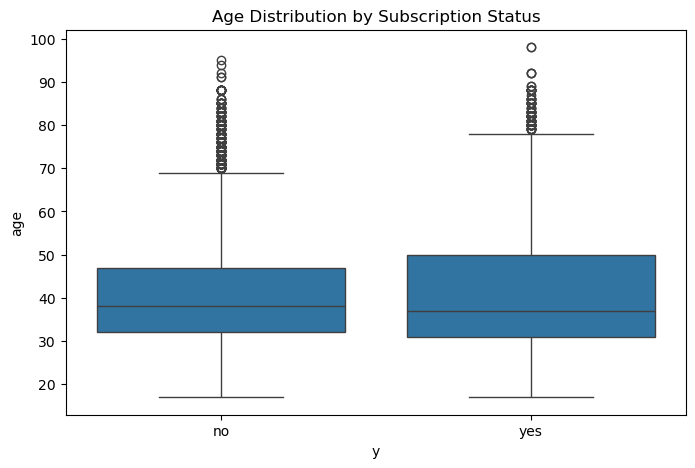

In [28]:
### Bivariate Analysis
# Relationship between Age and Subscription
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataAdditionalFull, x='y', y='age')
plt.title('Age Distribution by Subscription Status')
plt.savefig('images/ageSubscription.png')
plt.show()



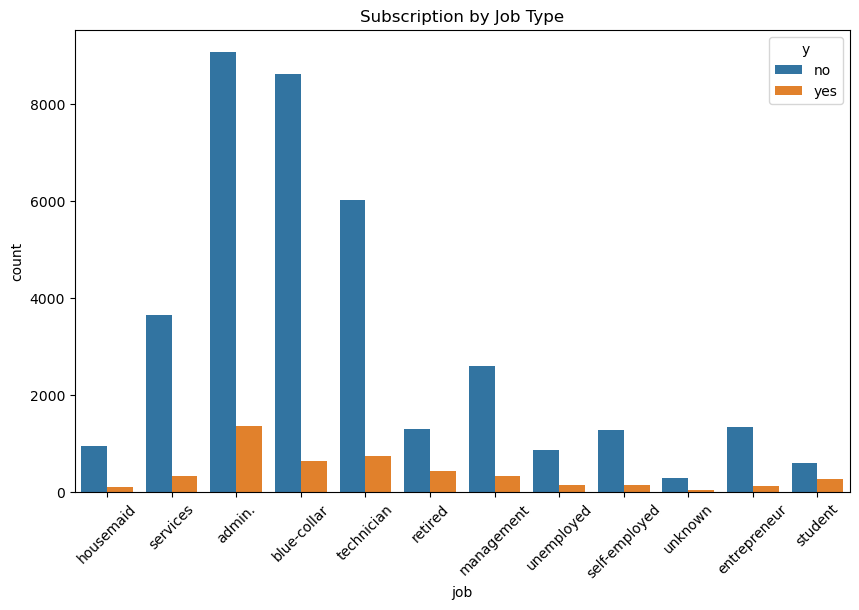

In [29]:
### Categorical Variable Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=dataAdditionalFull, x='job', hue='y')
plt.title('Subscription by Job Type')
plt.xticks(rotation=45)
plt.savefig('images/jobDistribution.png')
plt.show()

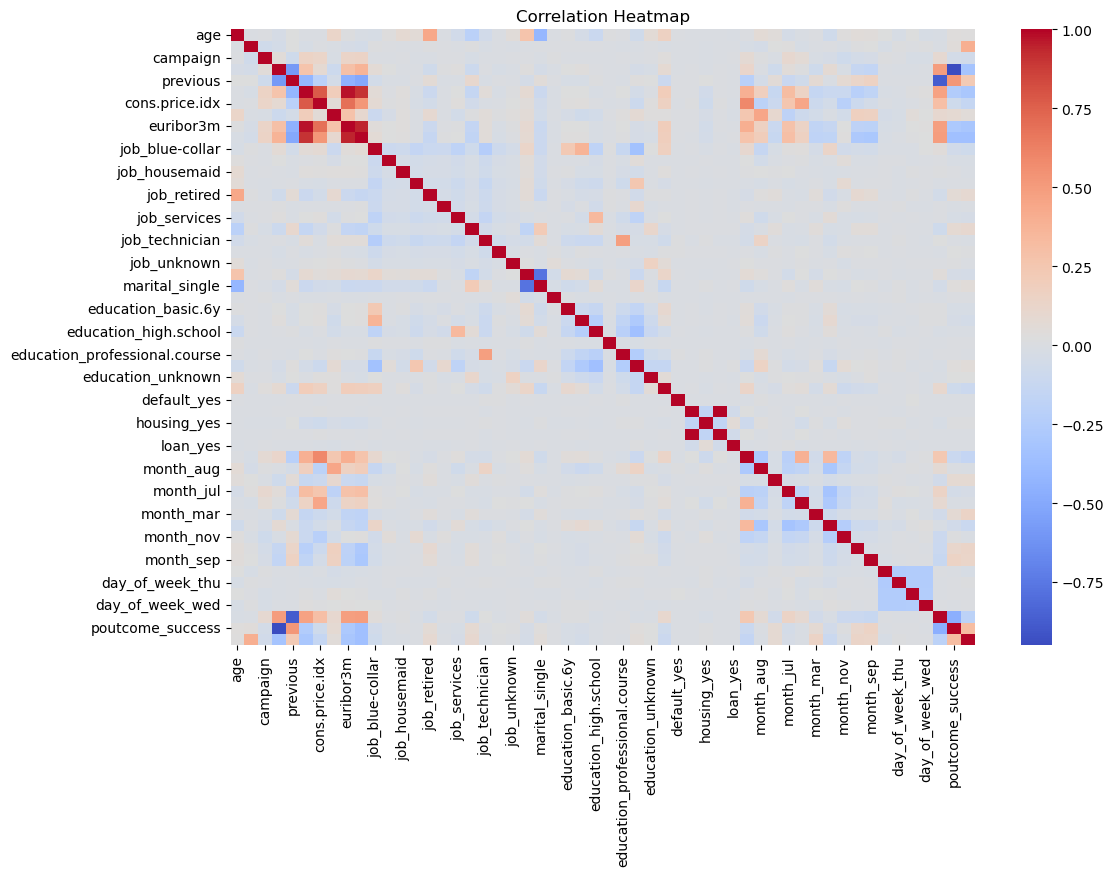

In [30]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Encoding categorical variables for correlation analysis
encoded_data = pd.get_dummies(dataAdditionalFull, drop_first=True)
correlation_matrix = encoded_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('images/correlationHeatmap.png')
plt.show()



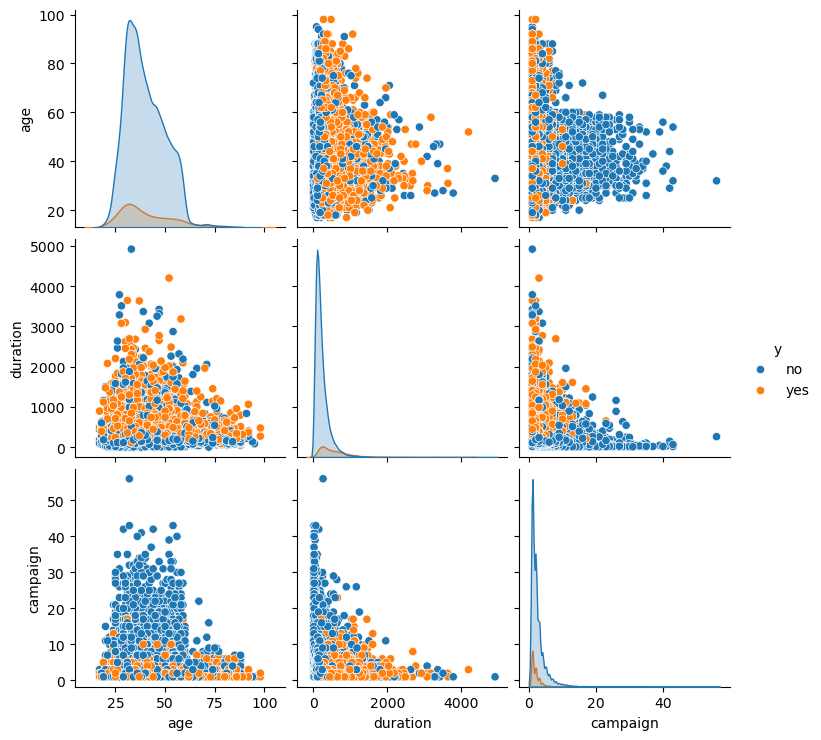

In [31]:
### 4.1. Multivariate Analysis
# Pairplot to visualize relationships between age, duration, and campaign
sns.pairplot(dataAdditionalFull[['age', 'duration', 'campaign', 'y']], hue='y', diag_kind='kde')
plt.savefig('images/pairplot.png')
plt.show()

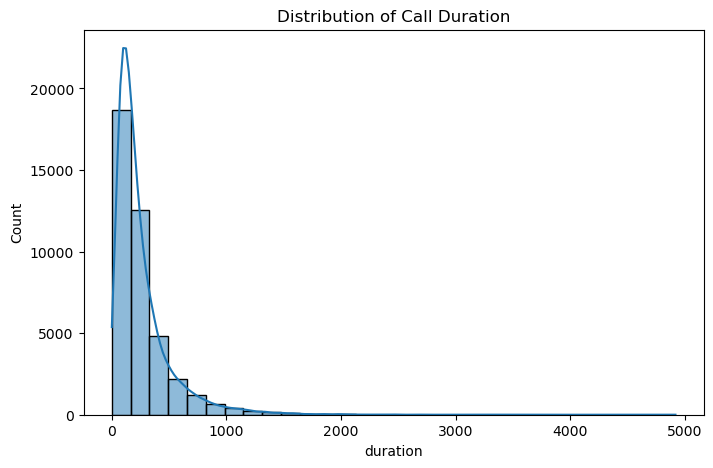

In [32]:
### 4.2. Duration Analysis
# Distribution of Call Duration
plt.figure(figsize=(8, 5))
sns.histplot(data=dataAdditionalFull, x='duration', bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.show()



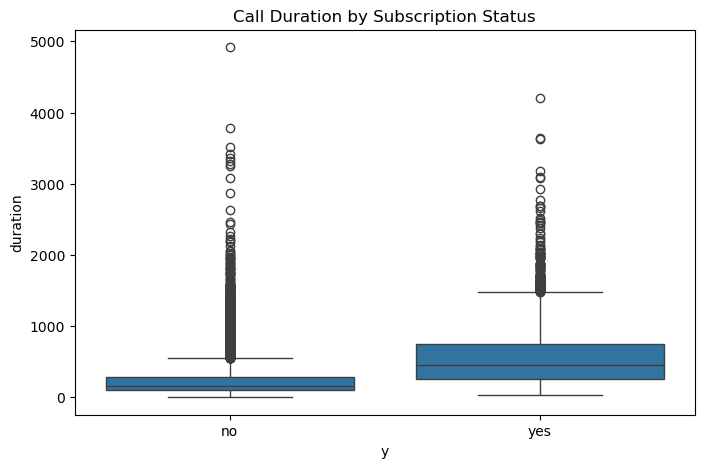

In [33]:
# Duration vs Subscription
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataAdditionalFull, x='y', y='duration')
plt.title('Call Duration by Subscription Status')
plt.show()



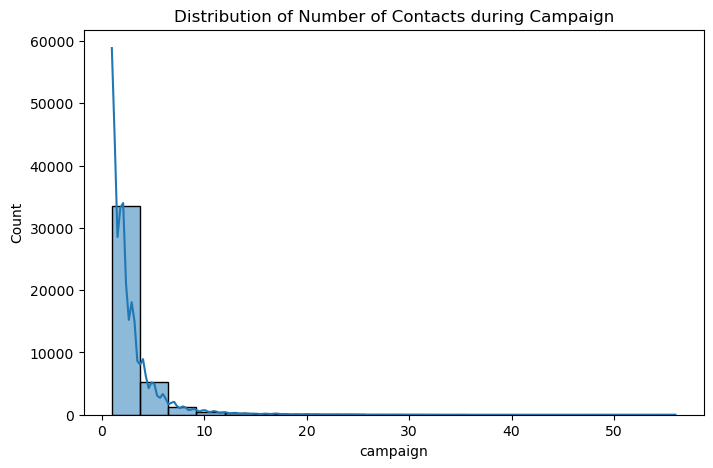

In [34]:
### 4.3. Campaign Analysis
# Distribution of Campaign Contacts
plt.figure(figsize=(8, 5))
sns.histplot(data=dataAdditionalFull, x='campaign', bins=20, kde=True)
plt.title('Distribution of Number of Contacts during Campaign')
plt.show()



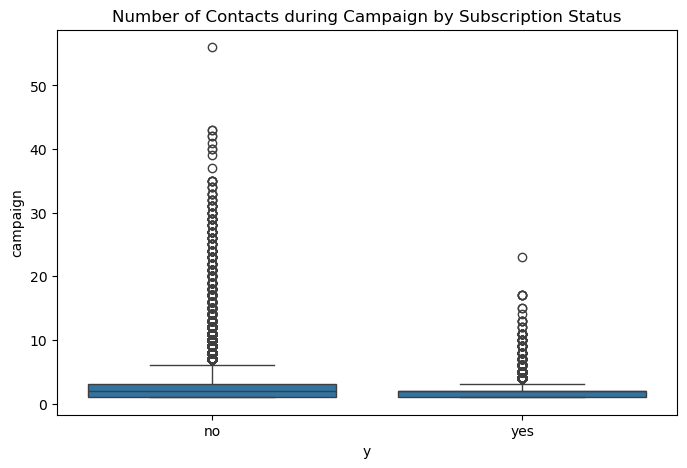

In [35]:
# Campaign Contacts vs Subscription
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataAdditionalFull, x='y', y='campaign')
plt.title('Number of Contacts during Campaign by Subscription Status')
plt.show()



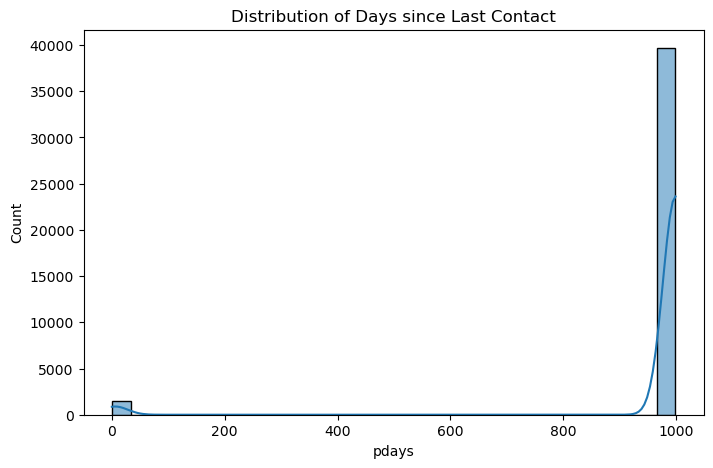

In [36]:
### 4.4. Pdays and Previous Campaign Outcome
# Distribution of Pdays
plt.figure(figsize=(8, 5))
sns.histplot(data=dataAdditionalFull, x='pdays', bins=30, kde=True)
plt.title('Distribution of Days since Last Contact')
plt.show()


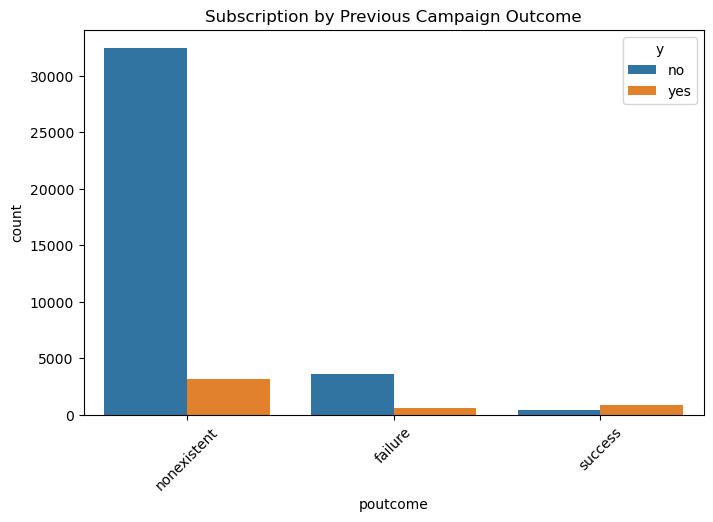

In [37]:

# Subscription Rate by Previous Outcome
plt.figure(figsize=(8, 5))
sns.countplot(data=dataAdditionalFull, x='poutcome', hue='y')
plt.title('Subscription by Previous Campaign Outcome')
plt.xticks(rotation=45)
plt.show()

### 12.7 Correlation Matrix Comparison

In [117]:
# Filter numerical columns for correlation calculation
bank_corr = dataBank.select_dtypes(include=['number']).corr()
bank_full_corr = dataBank.select_dtypes(include=['number']).corr()
bank_additional_corr = dataAdditional.select_dtypes(include=['number']).corr()
bank_additional_full_corr = dataAdditionalFull.select_dtypes(include=['number']).corr()

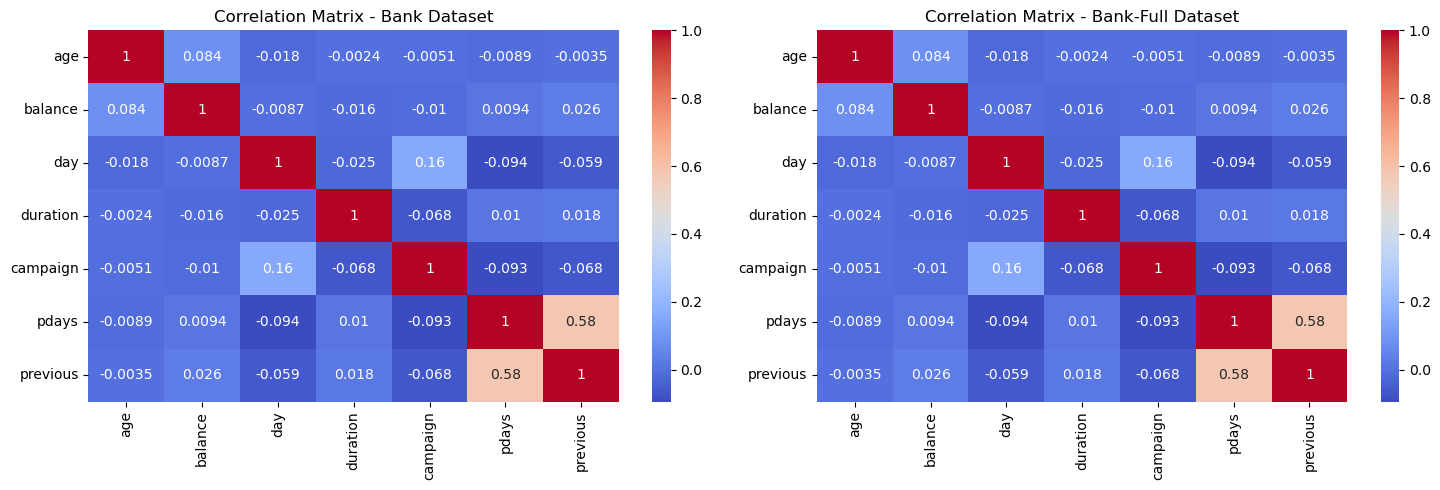

In [126]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(bank_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Bank Dataset')

plt.subplot(1, 2, 2)
sns.heatmap(bank_full_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Bank-Full Dataset')

plt.tight_layout()
plt.savefig("./images/bankdata_corr.png")
plt.show()

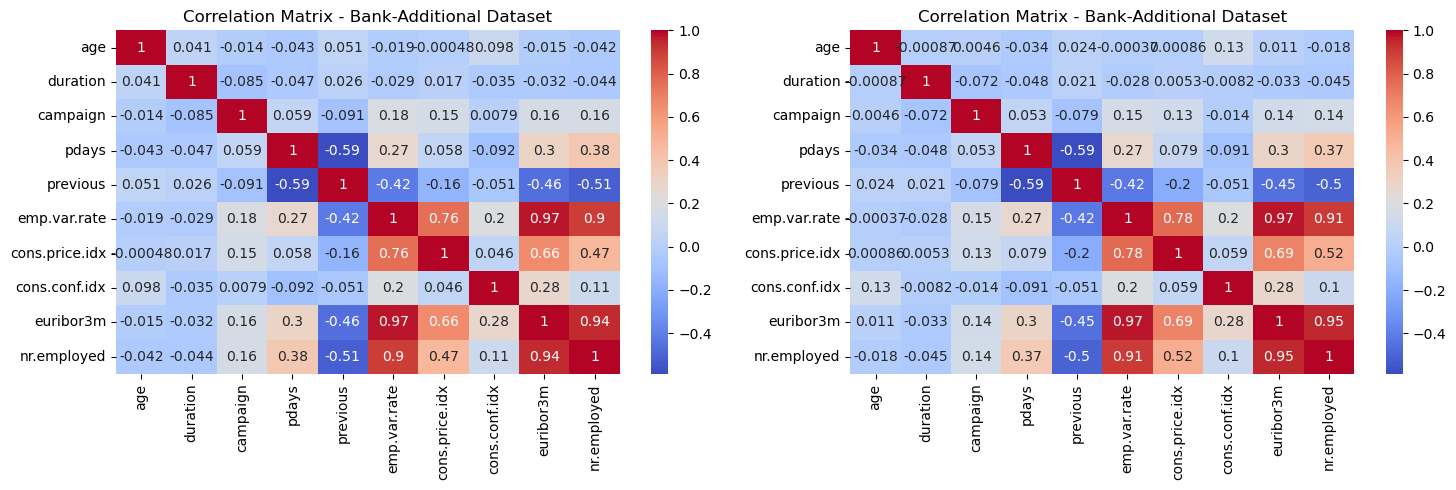

In [127]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(bank_additional_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Bank-Additional Dataset')

plt.subplot(1, 2, 2)
sns.heatmap(bank_additional_full_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Bank-Additional Dataset')
plt.tight_layout()
plt.savefig("./images/dataadditional_corr.png")
plt.show()

In [128]:
## 5. Data Quality Checks

### 5.1 Checking for Zero Values in Numerical Features
print('\nZero Values in Numerical Features:')
zero_counts = dataAdditionalFull.eq(0).sum()
print(zero_counts)




Zero Values in Numerical Features:
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


In [121]:
### 5.2 Checking for Zero Values in Categorical Features
print('\nZero Values in Categorical Features:')
zero_counts_cat = dataAdditionalFull.select_dtypes(exclude=np.number).eq('0').sum()
print(zero_counts_cat)




Zero Values in Categorical Features:
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64


In [122]:
### 5.3 Checking for Duplicates
print('\nChecking for Duplicate Rows:')
duplicate_count = dataAdditionalFull.duplicated().sum()
print(f'Number of Duplicate Rows: {duplicate_count}')




Checking for Duplicate Rows:
Number of Duplicate Rows: 12


In [123]:
### 5.4 Checking for Unique Values in Each Column
print('\nUnique Values per Column:')
unique_counts = dataAdditionalFull.nunique()
print(unique_counts)




Unique Values per Column:
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [124]:
### 5.5 Checking for Outliers using IQR
print('\nOutlier Detection:')
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    Q1 = dataAdditionalFull[col].quantile(0.25)
    Q3 = dataAdditionalFull[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((dataAdditionalFull[col] < lower_bound) | (dataAdditionalFull[col] > upper_bound)).sum()
    print(f'{col}: {outliers} outliers')



Outlier Detection:
age: 469 outliers
duration: 2963 outliers
campaign: 2406 outliers
pdays: 1515 outliers
previous: 5625 outliers
emp.var.rate: 0 outliers
cons.price.idx: 0 outliers
cons.conf.idx: 447 outliers
euribor3m: 0 outliers
nr.employed: 0 outliers



Scatter Plot of Outliers Before Removal:


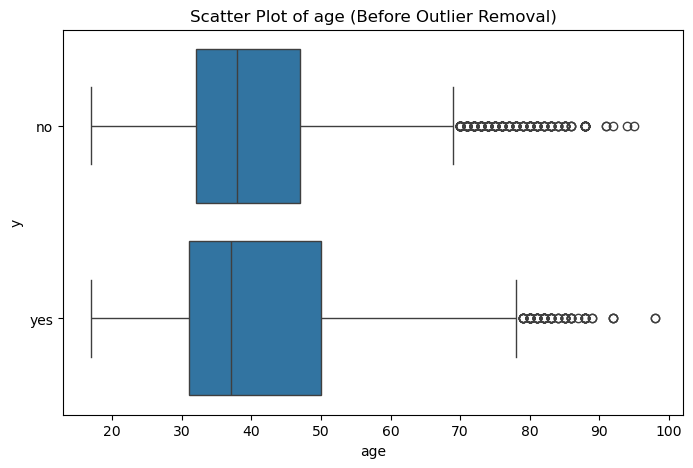

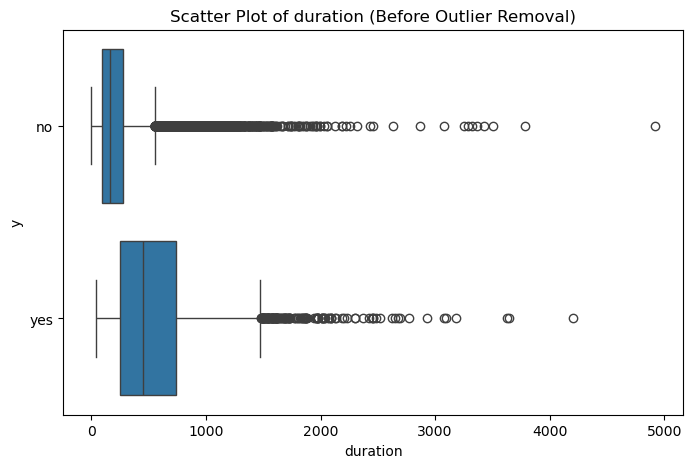

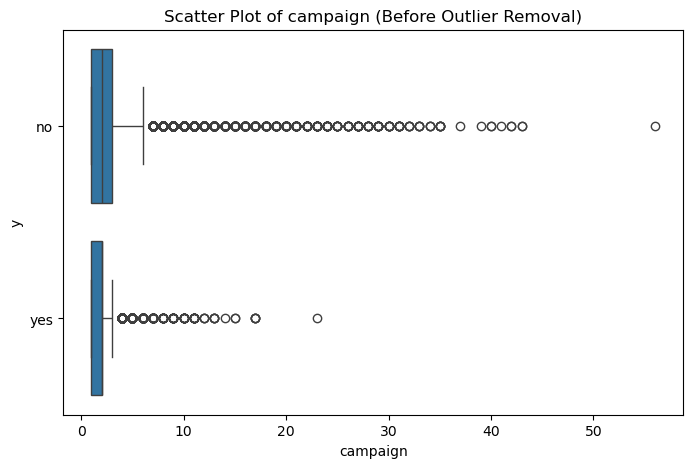

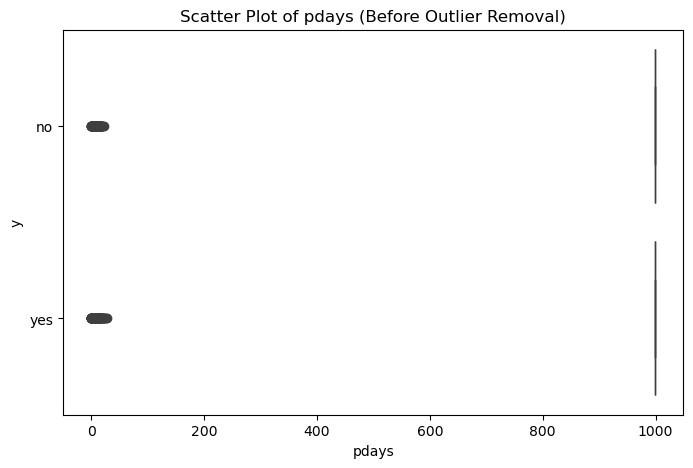

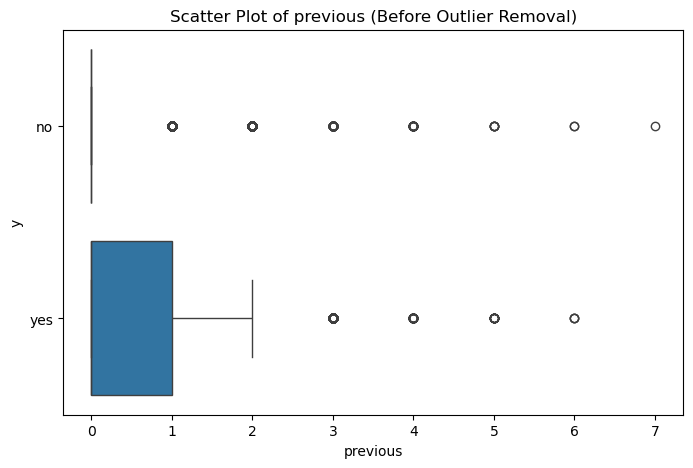

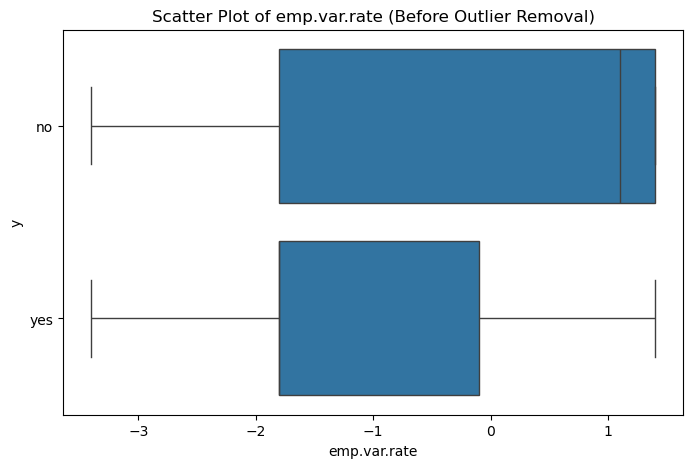

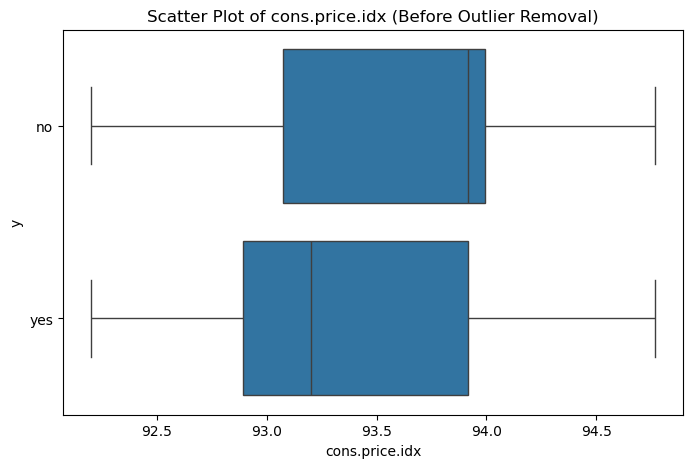

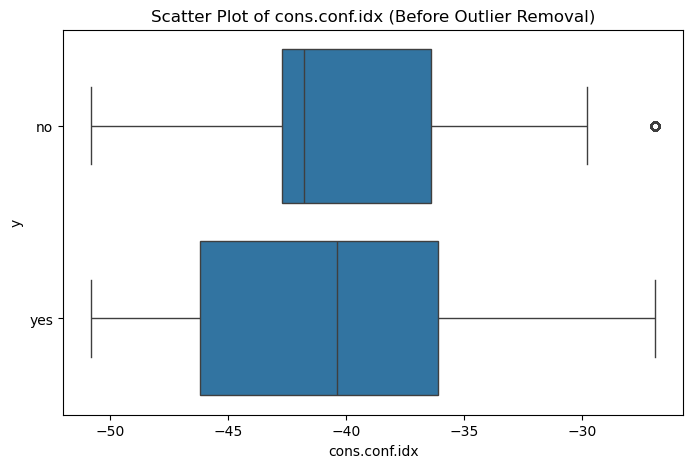

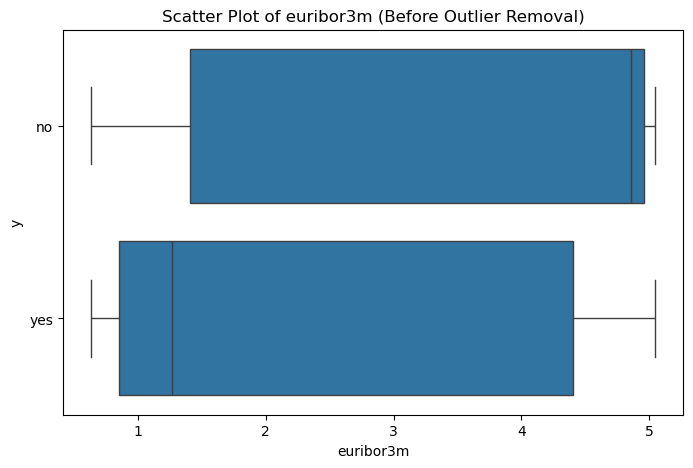

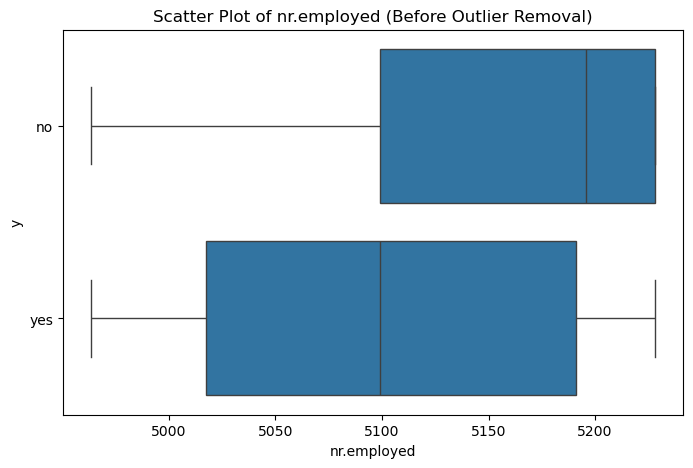

In [125]:
print('\nScatter Plot of Outliers Before Removal:')
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dataAdditionalFull, x=col, y='y')
    plt.title(f'Scatter Plot of {col} (Before Outlier Removal)')
    plt.savefig(f'images/scatterPlot_{col}_before.png')
    plt.show()

### Observation:
* Outliers are identified using the Interquartile Range (IQR) method.
* Numerical features with high outlier counts should be further investigated to determine if these are genuine anomalies or data entry errors.

### Summary:
* 1. Zero values are minimal or absent in both numerical and categorical features.
* 2. No significant issues with missing data, which simplifies preprocessing.
* 3. Duplicate rows are identified and should be removed.
* 4. Outliers are present in some numerical features and may require handling or transformation.
* 5. The unique value analysis shows variability in categorical and numerical features.

## 6. Data Preparation

In [46]:
### 6.1 Handling Duplicates
# Removing duplicate rows from the dataset
print('\nRemoving Duplicates:')
dataAdditionalFull = dataAdditionalFull.drop_duplicates()
print(f'Number of rows after removing duplicates: {dataAdditionalFull.shape[0]}')




Removing Duplicates:
Number of rows after removing duplicates: 41176


In [47]:
### 6.2 Handling Outliers
# Removing outliers from numerical features
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [48]:
print('\nRemoving outliers from numerical columns:')
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    original_count = dataAdditionalFull.shape[0]
    dataAdditionalFull = remove_outliers(dataAdditionalFull, col)
    print(f'{col}: Removed {original_count - dataAdditionalFull.shape[0]} outliers')




Removing outliers from numerical columns:
age: Removed 468 outliers
duration: Removed 2935 outliers
campaign: Removed 2249 outliers
pdays: Removed 1268 outliers
previous: Removed 3694 outliers
emp.var.rate: Removed 1542 outliers
cons.price.idx: Removed 0 outliers
cons.conf.idx: Removed 0 outliers
euribor3m: Removed 5922 outliers
nr.employed: Removed 0 outliers



Scatter Plot of Data After Outlier Removal:


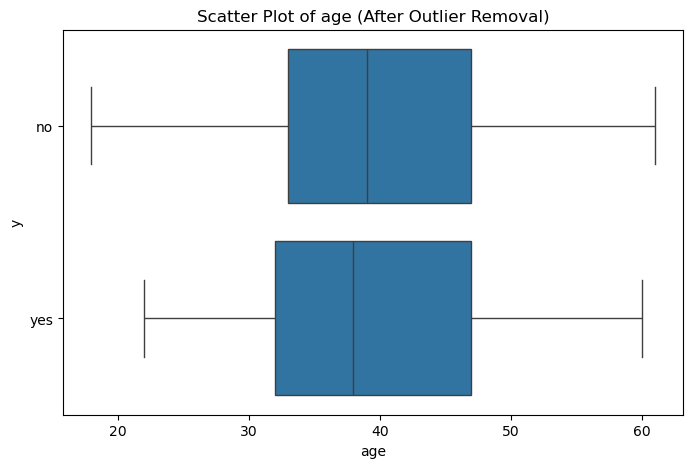

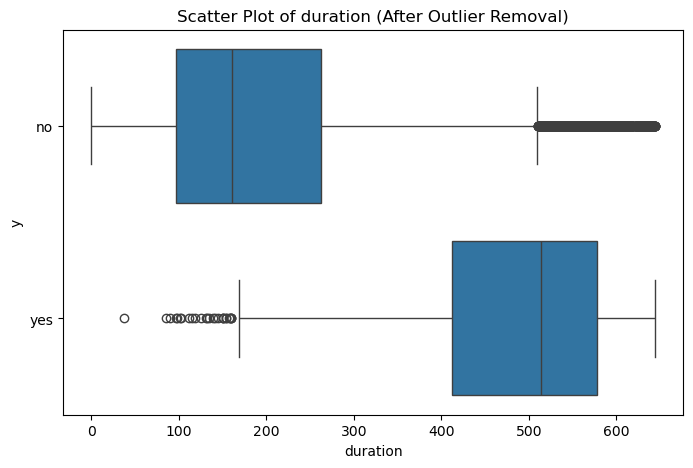

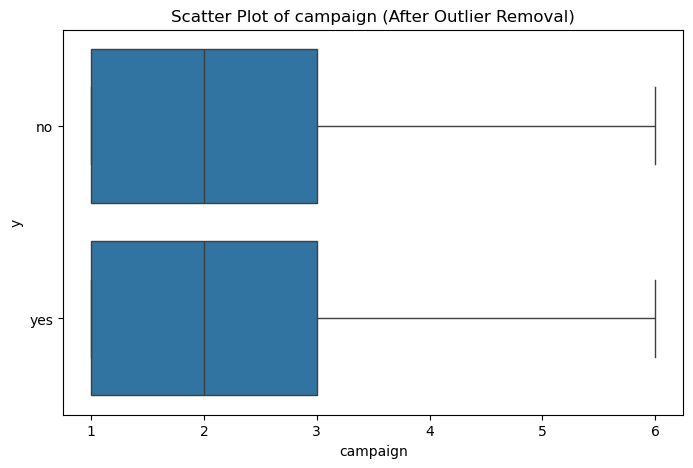

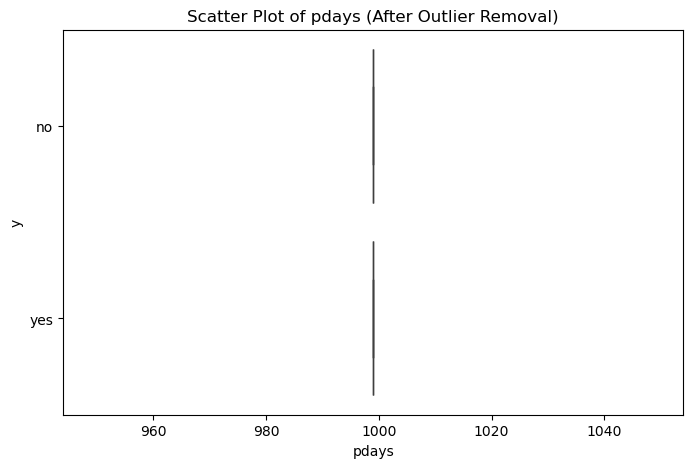

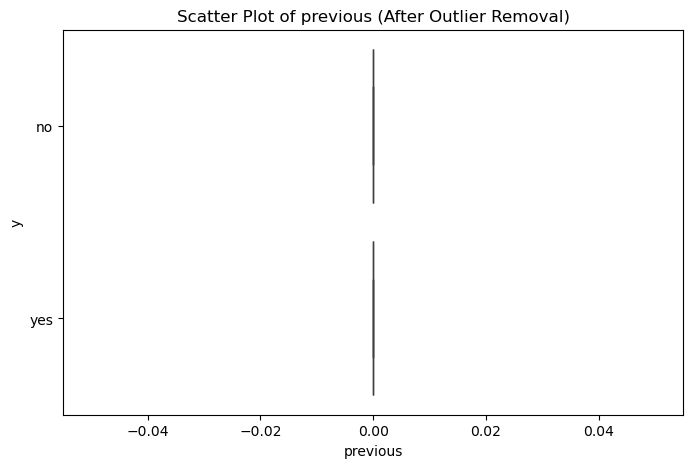

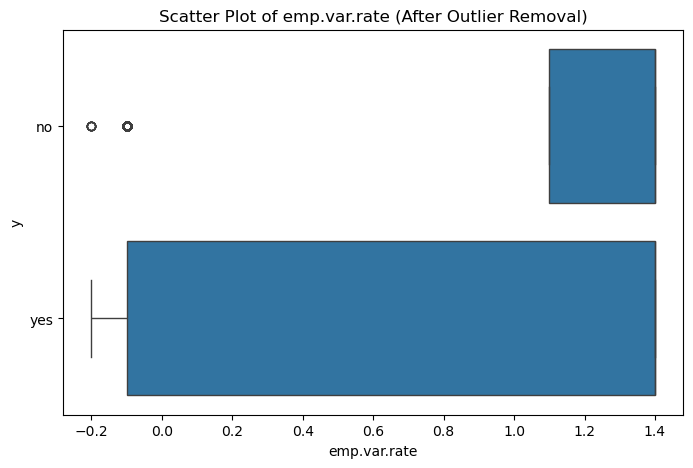

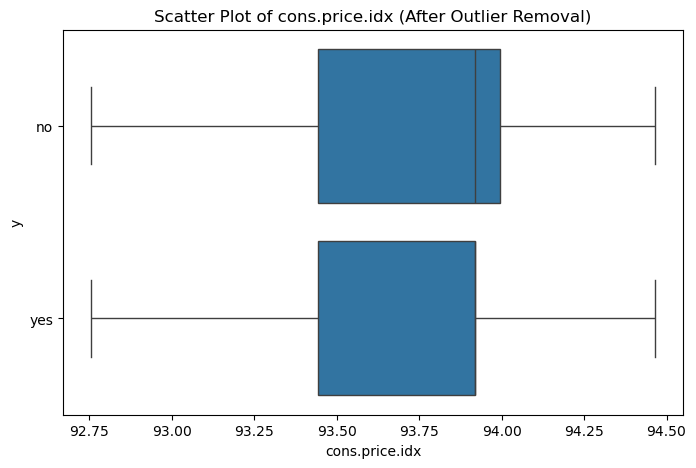

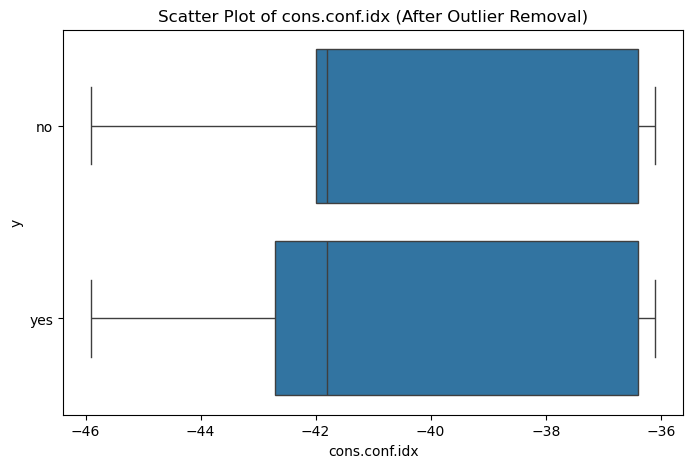

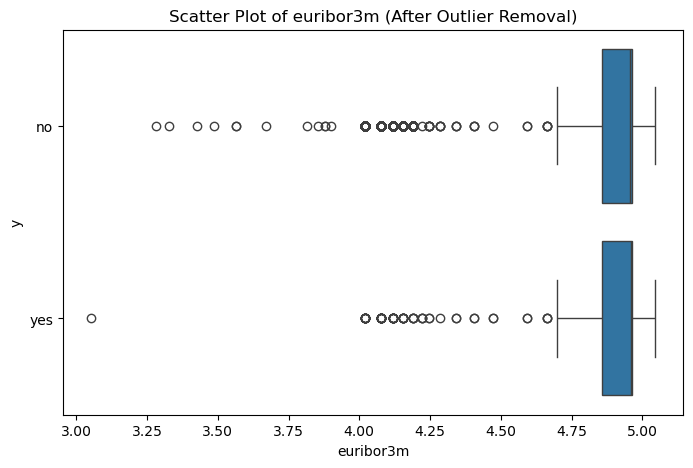

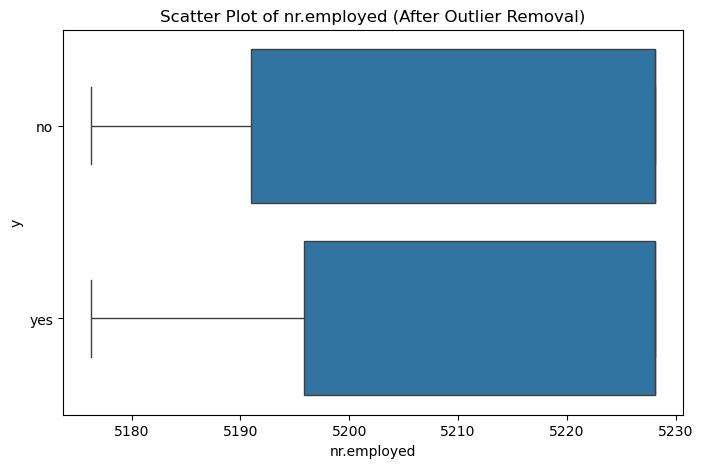

In [49]:
### 7.3 Scatter Plot of Data After Outlier Removal
print('\nScatter Plot of Data After Outlier Removal:')
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dataAdditionalFull, x=col, y='y')
    plt.title(f'Scatter Plot of {col} (After Outlier Removal)')
    plt.show()



Pairplot of Numerical Features After Outlier Removal:


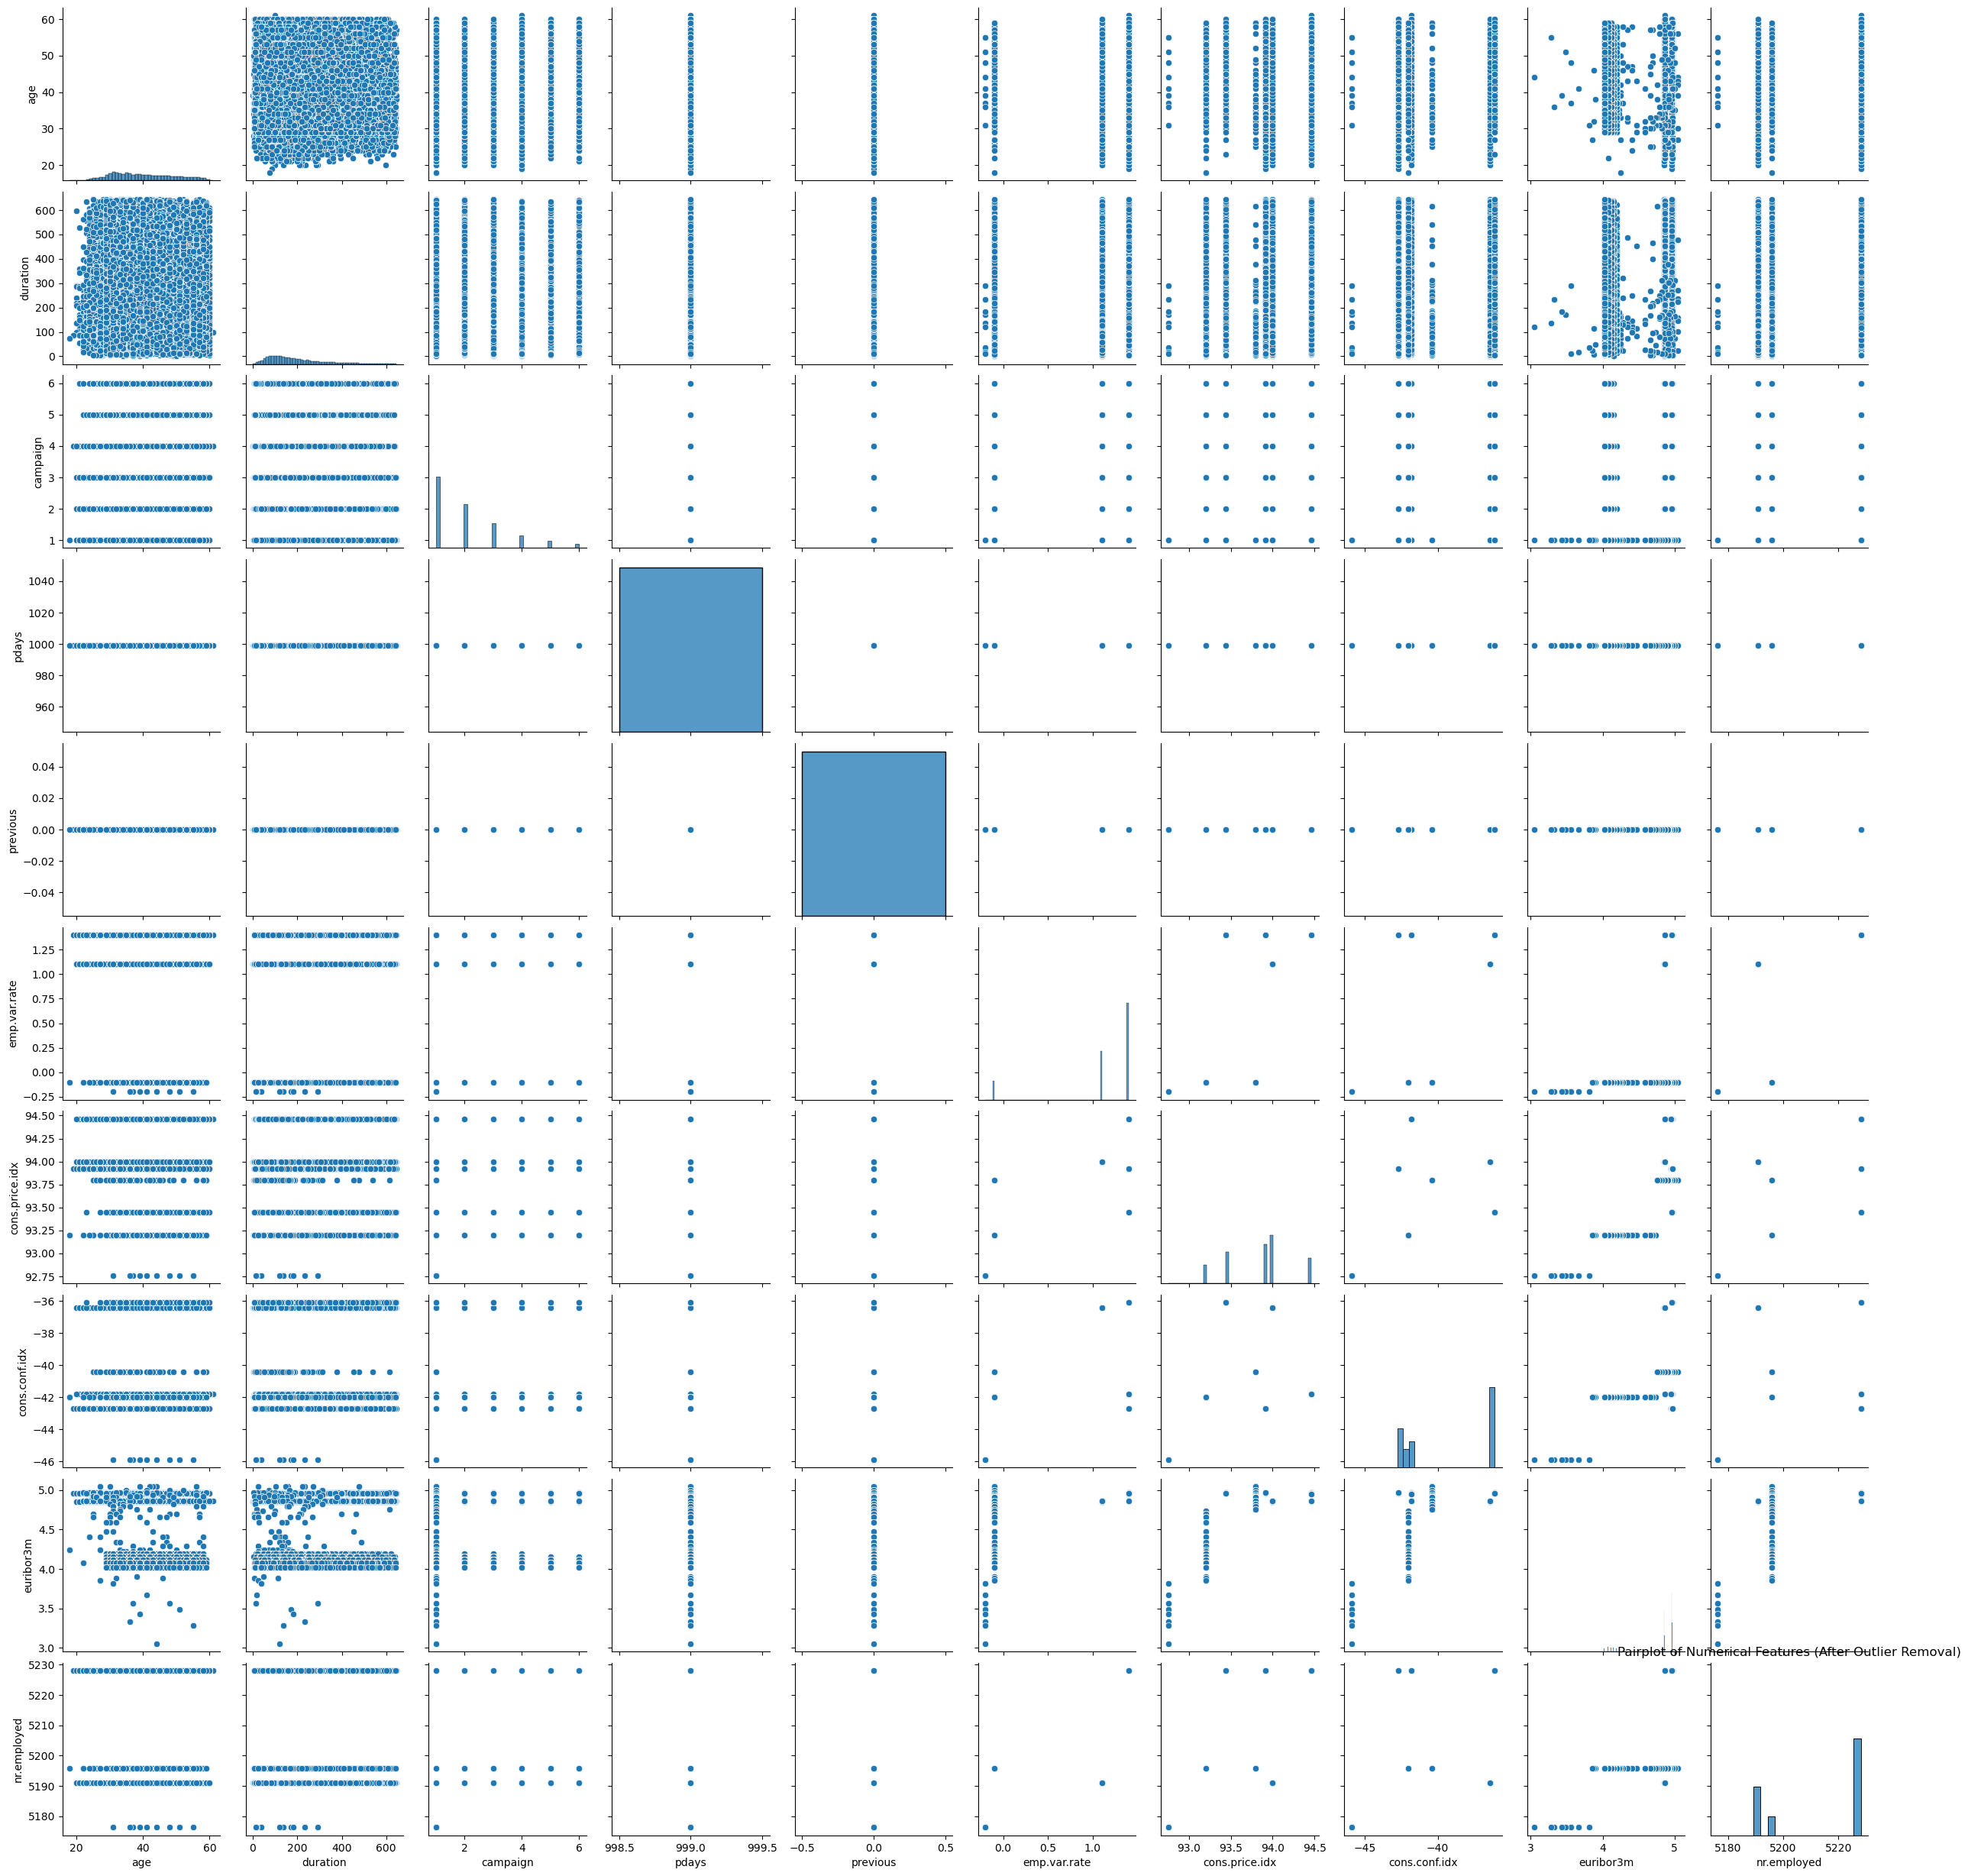

In [50]:
### 7.5 Pairplot of Numerical Features After Outlier Removal
print('\nPairplot of Numerical Features After Outlier Removal:')
sns.pairplot(dataAdditionalFull.select_dtypes(include=np.number))
plt.title('Pairplot of Numerical Features (After Outlier Removal)')
plt.show()

In [51]:
### 6.3 Encoding Categorical Variables
# Encoding categorical variables using One-Hot Encoding
print('\nEncoding Categorical Variables:')
data_encoded = pd.get_dummies(dataAdditionalFull, drop_first=True)
print(f'Encoded dataset shape: {data_encoded.shape}')




Encoding Categorical Variables:
Encoded dataset shape: (23098, 49)


In [52]:
### 8.1 Drop, Fill & Convert
print('\nData Cleaning: Drop, Fill & Convert')

# Dropping unnecessary columns (if any)
columns_to_drop = ['duration']  # Dropping 'duration' as it is known after the call and is not predictive
dataAdditionalFull = dataAdditionalFull.drop(columns=columns_to_drop, errors='ignore')



Data Cleaning: Drop, Fill & Convert


In [53]:

# Filling missing values with mean (for numerical) or mode (for categorical)
for col in dataAdditionalFull.columns:
    if dataAdditionalFull[col].dtype == 'object':
        dataAdditionalFull[col].fillna(dataAdditionalFull[col].mode()[0])
    else:
        dataAdditionalFull[col].fillna(dataAdditionalFull[col].mean())

print('Missing values handled and irrelevant columns dropped.')



Missing values handled and irrelevant columns dropped.



Skewness before Log Transformation:
age: 0.3149112891634146


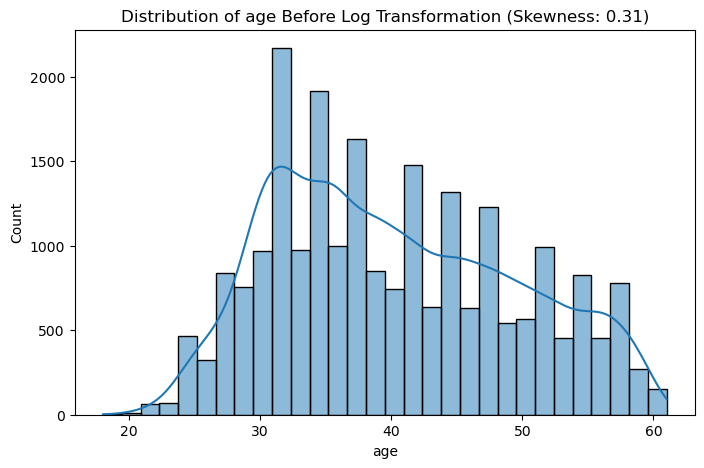

campaign: 1.203599949236128


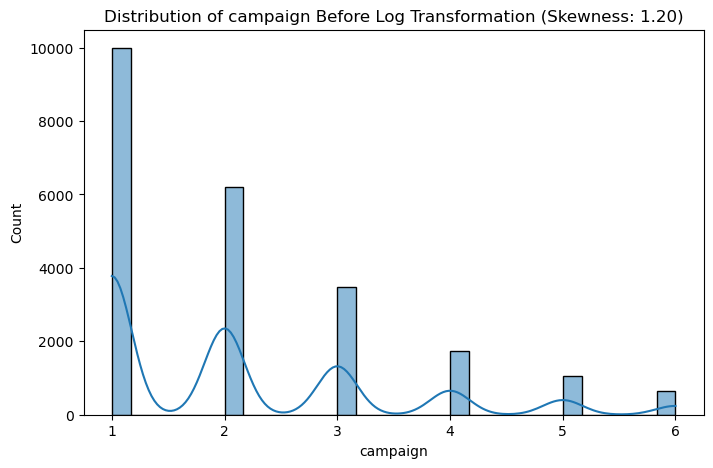

pdays: 0.0


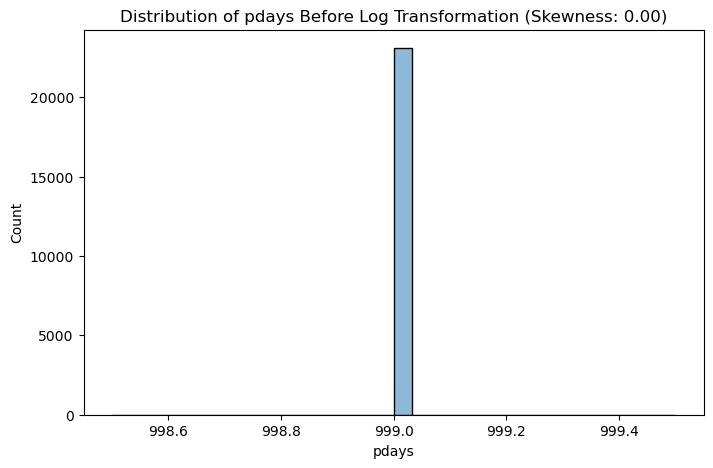

previous: 0.0


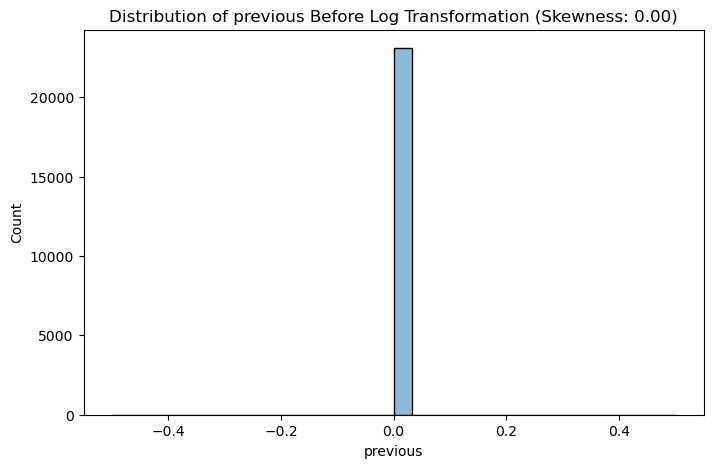

emp.var.rate: -2.046638426237786


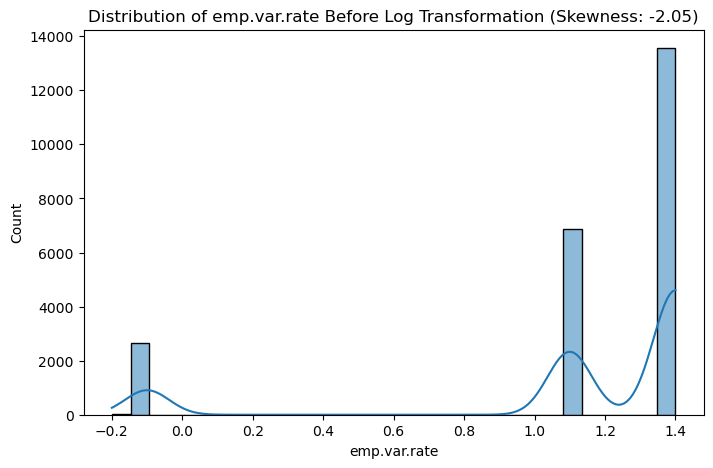

cons.price.idx: -0.14907427869062848


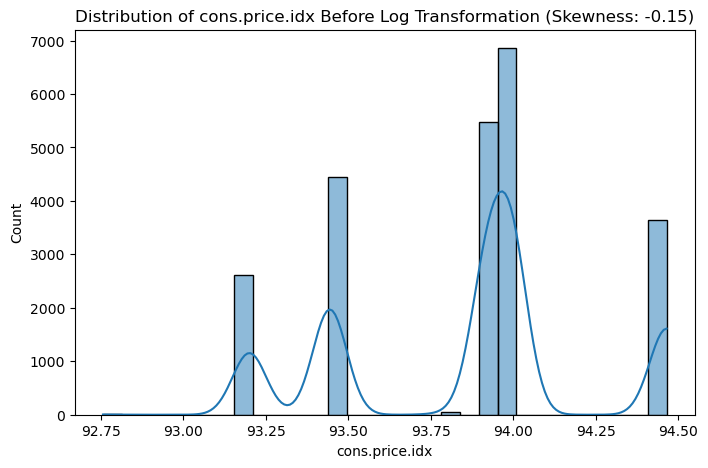

cons.conf.idx: 0.011228172708977073


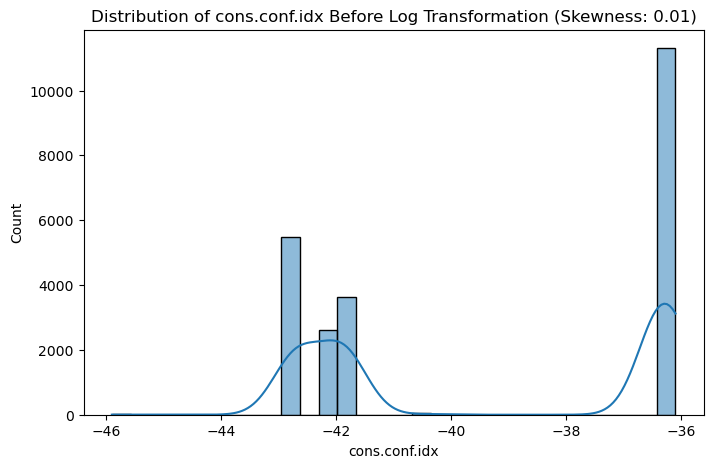

euribor3m: -2.345388783458134


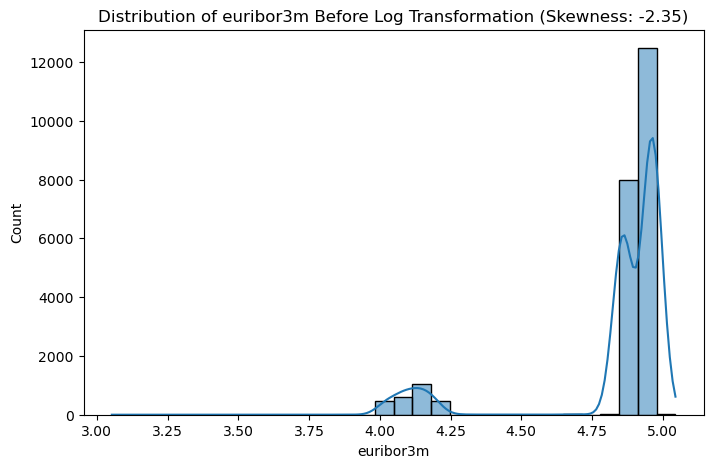

nr.employed: -0.37318878771370984


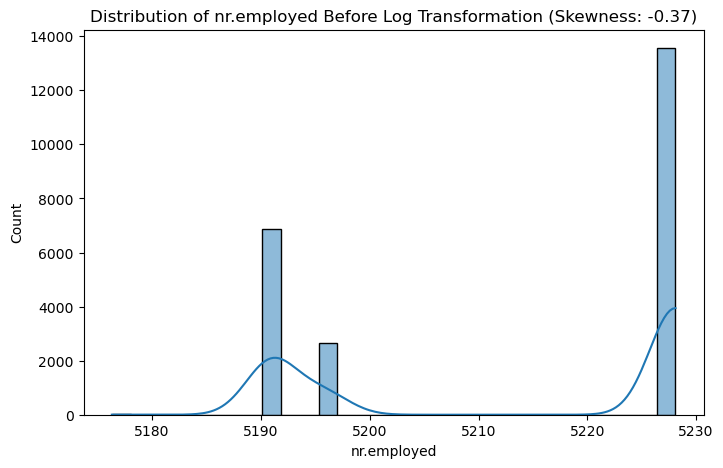

In [54]:
# Visualizing skewness before transformation
print('\nSkewness before Log Transformation:')
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    skewness = dataAdditionalFull[col].skew()
    print(f'{col}: {skewness}')
    plt.figure(figsize=(8, 5))
    sns.histplot(dataAdditionalFull[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} Before Log Transformation (Skewness: {skewness:.2f})')
    plt.show()

In [55]:
### 8.2 Log Transformation for Outliers
print('\nApplying Log Transformation to Reduce Skewness and Handle Outliers')
import numpy as np

# Applying log transformation to skewed numerical columns
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    if dataAdditionalFull[col].skew() > 1:
        dataAdditionalFull[col] = np.log1p(dataAdditionalFull[col])
        print(f'Log transformation applied to {col}')




Applying Log Transformation to Reduce Skewness and Handle Outliers
Log transformation applied to campaign



Skewness after Log Transformation:
age: 0.3149112891634146


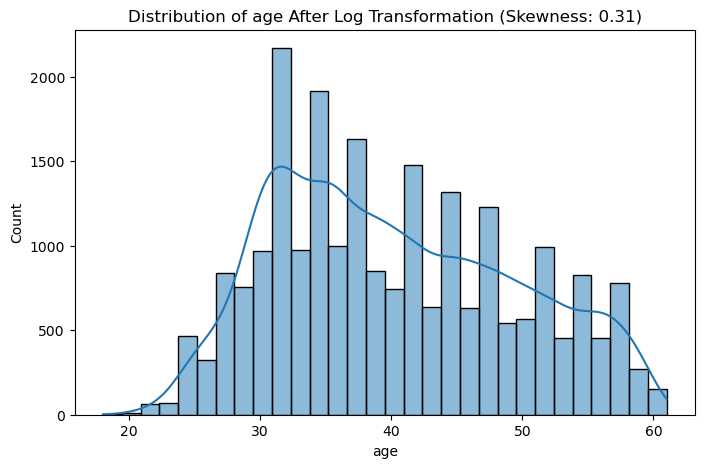

campaign: 0.6156904609020426


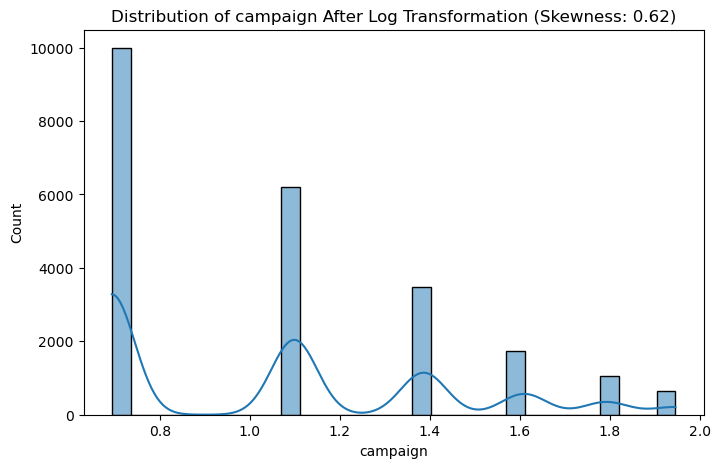

pdays: 0.0


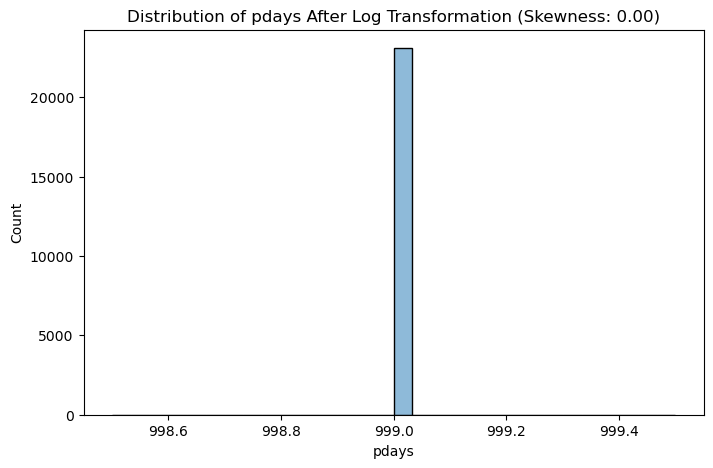

previous: 0.0


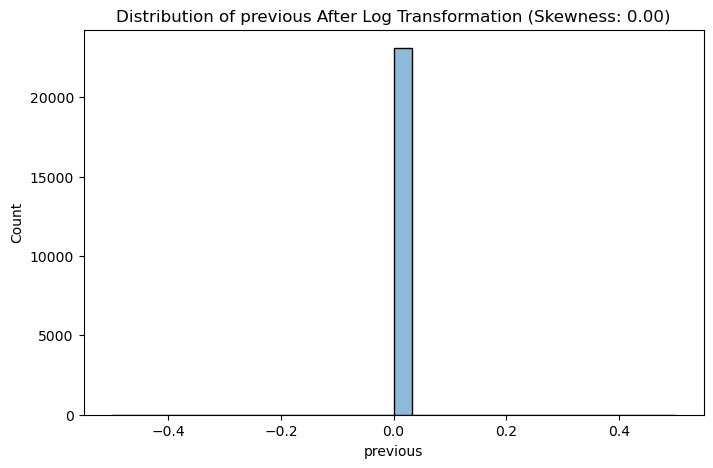

emp.var.rate: -2.046638426237786


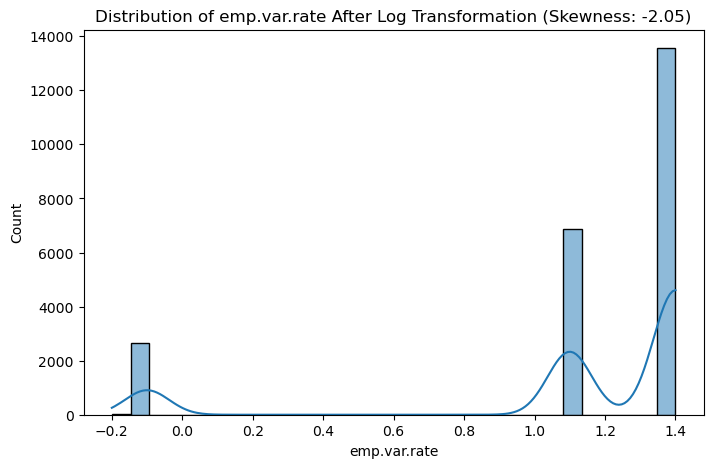

cons.price.idx: -0.14907427869062848


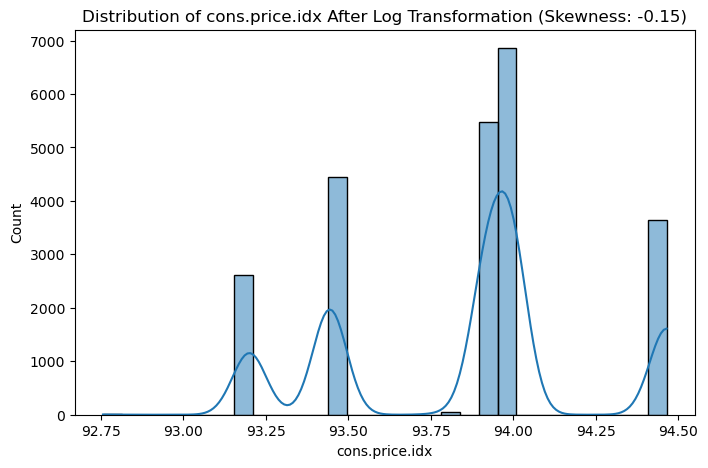

cons.conf.idx: 0.011228172708977073


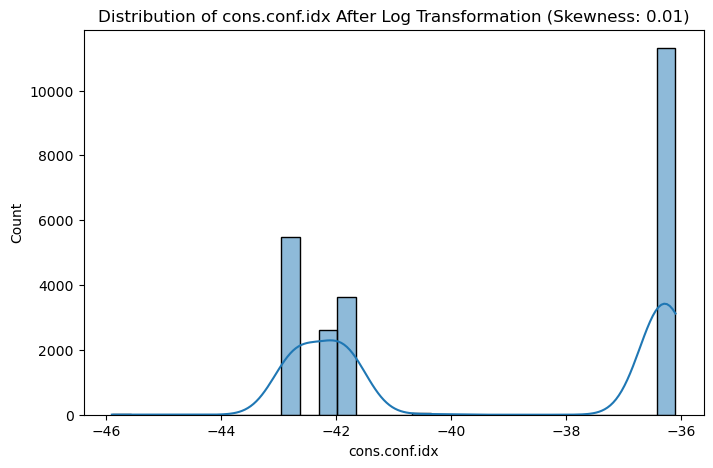

euribor3m: -2.345388783458134


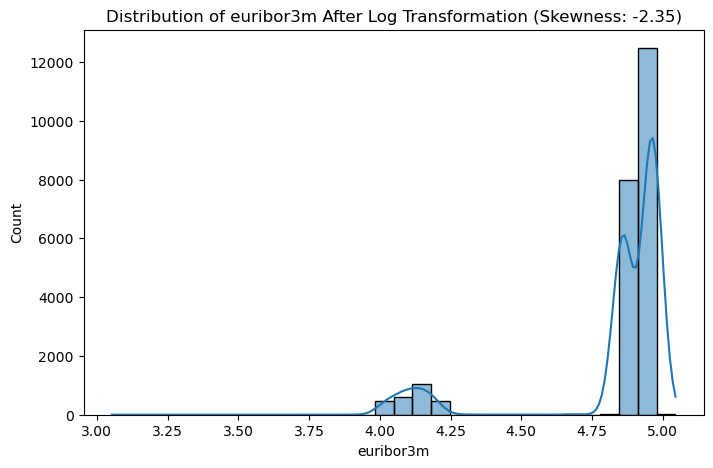

nr.employed: -0.37318878771370984


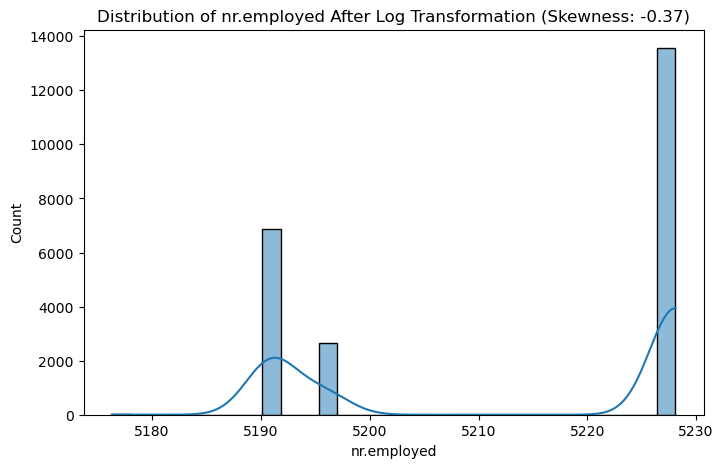

In [56]:
# Visualizing skewness after transformation
print('\nSkewness after Log Transformation:')
for col in dataAdditionalFull.select_dtypes(include=np.number).columns:
    skewness = dataAdditionalFull[col].skew()
    print(f'{col}: {skewness}')
    plt.figure(figsize=(8, 5))
    sns.histplot(dataAdditionalFull[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} After Log Transformation (Skewness: {skewness:.2f})')
    plt.show()

In [57]:
### 8.3 Dimensionality Reduction using PCA
print('\nApplying PCA for Dimensionality Reduction')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scaling numerical data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataAdditionalFull.select_dtypes(include=np.number))





Applying PCA for Dimensionality Reduction


In [58]:
# Applying PCA to reduce dimensionality while retaining 95% variance
pca = PCA(n_components=0.95, random_state=42)
pca_data = pca.fit_transform(scaled_data)

print(f'Number of components after PCA: {pca.n_components_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Number of components after PCA: 5
Explained variance ratio: [0.39373017 0.19117589 0.14401013 0.13856295 0.11895966]


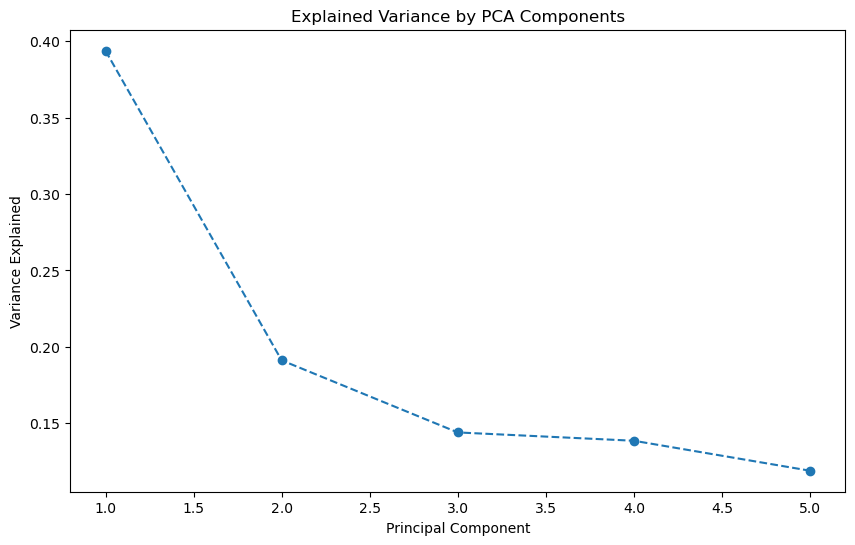

In [59]:
# Visualizing PCA Variance Explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [60]:
### 8.4 Integrating PCA-transformed data with categorical features
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
encoded_categorical = pd.get_dummies(dataAdditionalFull.select_dtypes(exclude=np.number), drop_first=True)
final_data = pd.concat([pca_df, encoded_categorical], axis=1)


In [61]:
print(f'Final dataset shape after PCA and integration: {final_data.shape}')

Final dataset shape after PCA and integration: (26426, 44)


In [62]:
### 9.1 Handling Missing Values
print('\nRechecking for Missing Values before Scaling:')
missing_values = final_data.isnull().sum()
print(missing_values[missing_values > 0])





Rechecking for Missing Values before Scaling:
PC1                              3328
PC2                              3328
PC3                              3328
PC4                              3328
PC5                              3328
job_blue-collar                  3328
job_entrepreneur                 3328
job_housemaid                    3328
job_management                   3328
job_retired                      3328
job_self-employed                3328
job_services                     3328
job_student                      3328
job_technician                   3328
job_unemployed                   3328
job_unknown                      3328
marital_married                  3328
marital_single                   3328
marital_unknown                  3328
education_basic.6y               3328
education_basic.9y               3328
education_high.school            3328
education_illiterate             3328
education_professional.course    3328
education_university.degree      3328
edu

In [63]:
### Fixing Any Remaining NaN Values
if missing_values.sum() > 0:
    print('\nFilling Remaining NaN Values with 0 as a Safety Measure')
    final_data = final_data.fillna(0)
    print('Remaining NaN values handled.')


Filling Remaining NaN Values with 0 as a Safety Measure
Remaining NaN values handled.


In [ ]:


print('\nApplying Feature Scaling')
#from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = final_data.select_dtypes(include=np.number).columns
final_data[numerical_columns] = scaler.fit_transform(final_data[numerical_columns])
print('Feature scaling applied successfully.')




Applying Feature Scaling
Feature scaling applied successfully.


In [129]:
### 9.2 Splitting Data into Train and Test Sets
print('\nSplitting Data into Training and Testing Sets')
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = final_data.drop('y_yes', axis=1)
y = final_data['y_yes']

# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Test Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}')




Splitting Data into Training and Testing Sets
Training Set Shape: X_train: (21140, 43), y_train: (21140,)
Test Set Shape: X_test: (5286, 43), y_test: (5286,)



Box Plot of Scaled Features:


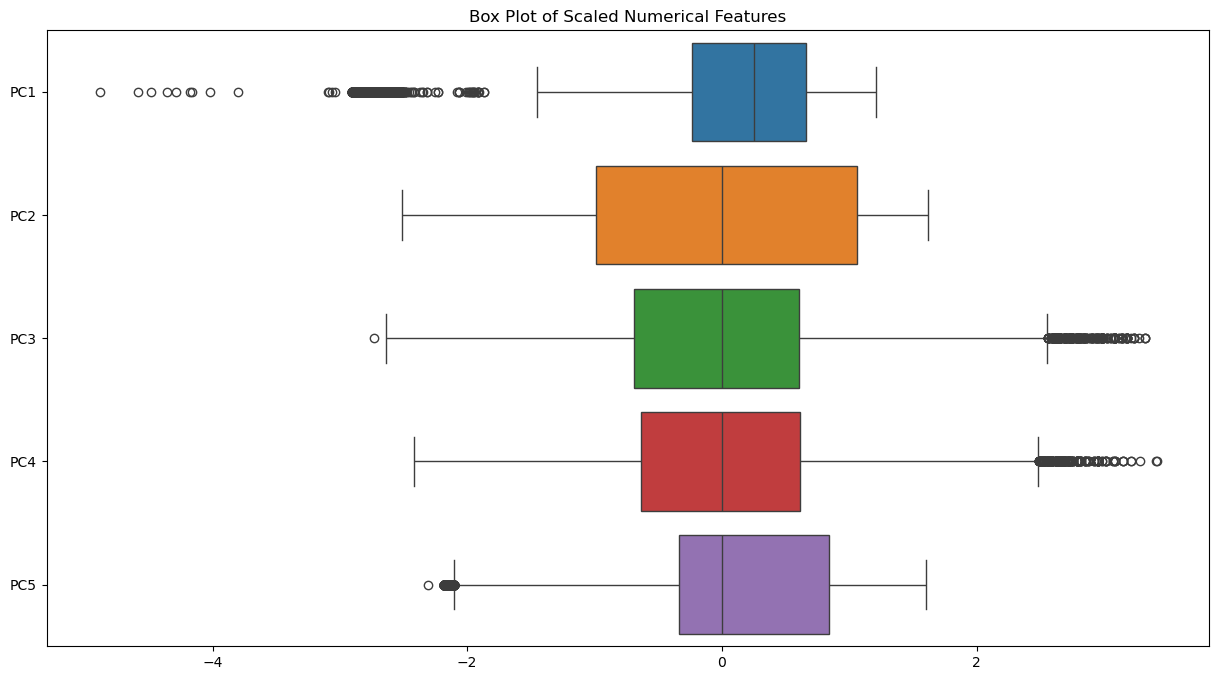

In [130]:
## 10. Visualizing Scaled Data

### 10.1 Box Plot of Scaled Features
print('\nBox Plot of Scaled Features:')
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_data[numerical_columns], orient='h')
plt.title('Box Plot of Scaled Numerical Features')
plt.show()



Pair Plot of Principal Components:


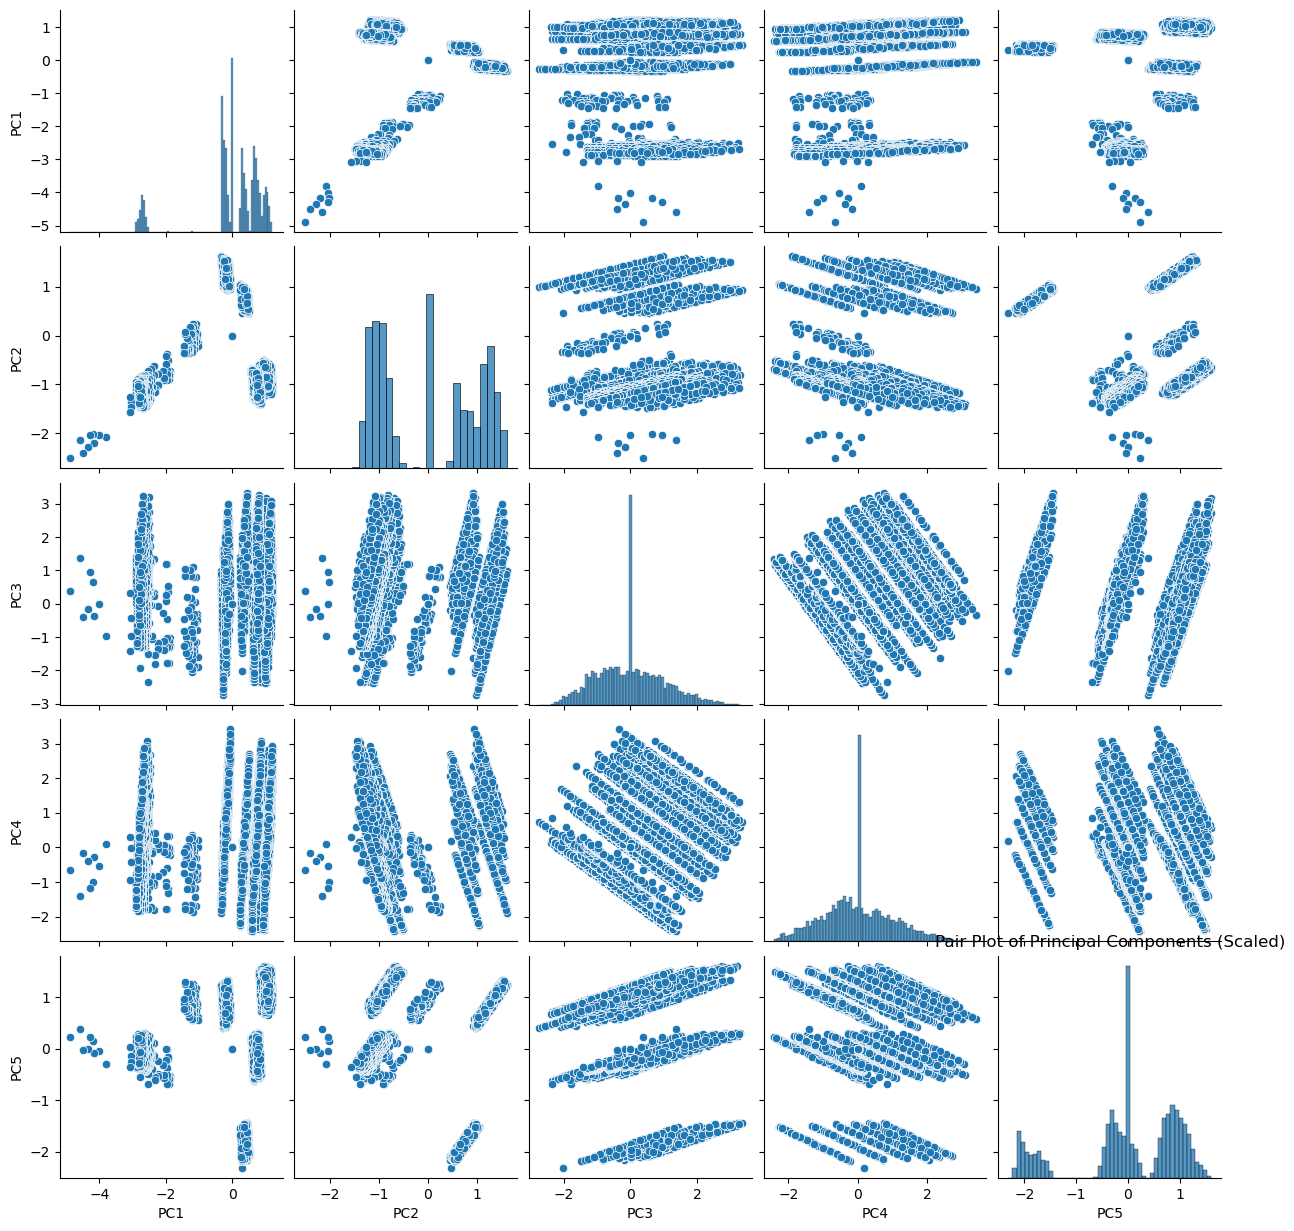

In [131]:

### 10.2 Pair Plot of Principal Components (PCA)
print('\nPair Plot of Principal Components:')
pca_columns = [col for col in final_data.columns if col.startswith('PC')]
sns.pairplot(final_data[pca_columns])
plt.title('Pair Plot of Principal Components (Scaled)')
plt.show()



Distribution of Target Variable (y_yes) After Scaling:


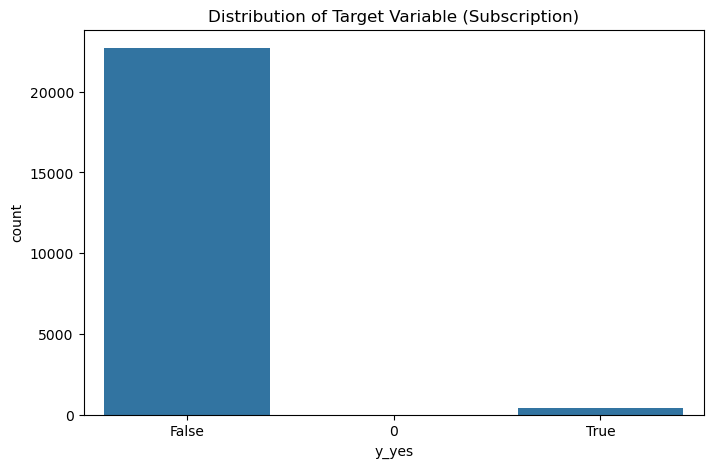

In [68]:

### 10.3 Distribution of Target Variable after Scaling
print('\nDistribution of Target Variable (y_yes) After Scaling:')
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Distribution of Target Variable (Subscription)')
plt.savefig('images/targetDistributionAfterScaling.png')
plt.show()

## 11. Data Preparation Summary

The data preparation process for the direct bank marketing analysis was conducted in a structured and comprehensive manner. Below are the key steps taken to ensure data quality and readiness for modeling:

### 11.1 Data Cleaning
1. Removed unnecessary columns such as 'duration' that are known only after the outcome and do not aid in prediction.
2. Checked and handled missing values by filling numerical columns with the mean and categorical columns with the mode.
3. Addressed remaining NaN values before scaling to ensure no data leakage or errors.

### 11.2 Handling Outliers
1. Identified outliers using the Interquartile Range (IQR) method.
2. Applied log transformation to skewed numerical features to reduce the impact of outliers and normalize data distribution.
3. Visualized the effect of outlier handling using scatter plots and pair plots.

### 11.3 Dimensionality Reduction
1. Applied Principal Component Analysis (PCA) to reduce dimensionality while retaining 95% variance.
2. Visualized the explained variance by PCA components to ensure efficient data representation.
3. Combined PCA-transformed data with one-hot encoded categorical features to create a final dataset.

### 11.4 Feature Scaling
1. Applied StandardScaler to standardize numerical features, achieving zero mean and unit variance.
2. Visualized scaled data using box plots to ensure uniform scaling.

### 11.5 Train-Test Splitting
1. Split the final preprocessed dataset into training and testing sets (80-20 split).
2. Applied stratification to preserve the distribution of the target variable ('y_yes').

### 11.6 Visualizations and Validation
1. Used scatter plots, box plots, pair plots, and distribution plots to validate data transformations.
2. Ensured that data quality and consistency were maintained after each transformation step.

---

### Summary:
The data preparation pipeline effectively handled data cleaning, outlier management, dimensionality reduction, feature scaling, and train-test splitting. These steps ensured that the data was consistent, normalized, and ready for efficient model training and evaluation. The resulting dataset is well-prepared to build robust and accurate predictive models.



## 12. Classification Modeling

In this section, we will build and evaluate four classification models to predict term deposit subscription:
1. **K-Nearest Neighbors (KNN)**
2. **Logistic Regression**
3. **Decision Trees**
4. **Support Vector Machines (SVM)**

We will evaluate model performance using:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC Score

In [135]:
### 12.2 Ensuring Correct Encoding for Target Variable
print('\nEnsuring the Target Variable is Binary Encoded:')
print(f'Target variable unique values (y_train): {y_train.unique()}')
print(f'Target variable data type (y_train): {y_train.dtype}')
print(f'Target variable unique values (y_test): {y_test.unique()}')
print(f'Target variable data type (y_test): {y_test.dtype}')

# Fixing the target variable to be binary (0 and 1) explicitly
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print('Target variables converted to integer format.')

### Verifying Again After Fix
print(f'After conversion - y_train unique values: {y_train.unique()}')
print(f'After conversion - y_test unique values: {y_test.unique()}')




Ensuring the Target Variable is Binary Encoded:
Target variable unique values (y_train): [0 1]
Target variable data type (y_train): int32
Target variable unique values (y_test): [0 1]
Target variable data type (y_test): int32
Target variables converted to integer format.
After conversion - y_train unique values: [0 1]
After conversion - y_test unique values: [0 1]


In [136]:
### 12.2 Helper Function for Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f'Performance of {model_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print(f'Confusion Matrix:{confusion_matrix(y_true, y_pred)}')
    print(f'Classification Report: {classification_report(y_true, y_pred)}')
    print('-' * 50)

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'images/confusion_matrix_{model_name}.png')


Training K-Nearest Neighbors...
Performance of K-Nearest Neighbors:
Accuracy: 0.9858
Precision: 1.0000
Recall: 0.0506
F1-Score: 0.0964
ROC-AUC: 0.5253
Confusion Matrix:[[5207    0]
 [  75    4]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5207
           1       1.00      0.05      0.10        79

    accuracy                           0.99      5286
   macro avg       0.99      0.53      0.54      5286
weighted avg       0.99      0.99      0.98      5286

--------------------------------------------------


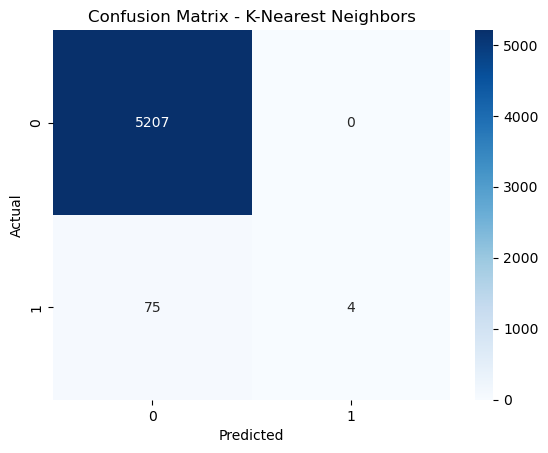

In [137]:
### 12.4 K-Nearest Neighbors (KNN)
print('Training K-Nearest Neighbors...')
knn = KNeighborsClassifier()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, 'K-Nearest Neighbors')



Training Logistic Regression...
Performance of Logistic Regression:
Accuracy: 0.9854
Precision: 0.7500
Recall: 0.0380
F1-Score: 0.0723
ROC-AUC: 0.5189
Confusion Matrix:[[5206    1]
 [  76    3]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5207
           1       0.75      0.04      0.07        79

    accuracy                           0.99      5286
   macro avg       0.87      0.52      0.53      5286
weighted avg       0.98      0.99      0.98      5286

--------------------------------------------------


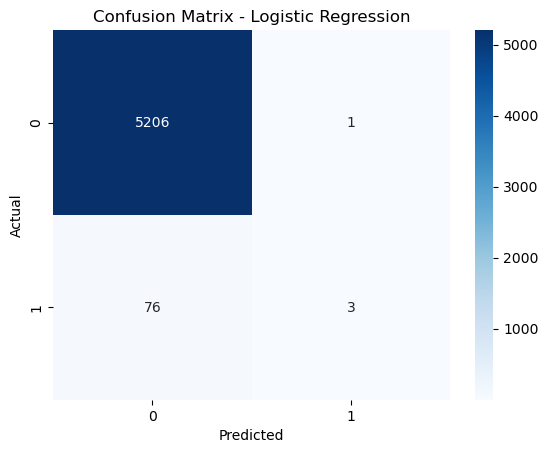

In [72]:
### 12.6 Logistic Regression
print('\nTraining Logistic Regression...')
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_log, 'Logistic Regression')


Training Decision Tree...
Performance of Decision Tree:
Accuracy: 0.9678
Precision: 0.0667
Recall: 0.0886
F1-Score: 0.0761
ROC-AUC: 0.5349
Confusion Matrix:[[5109   98]
 [  72    7]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98      5207
           1       0.07      0.09      0.08        79

    accuracy                           0.97      5286
   macro avg       0.53      0.53      0.53      5286
weighted avg       0.97      0.97      0.97      5286

--------------------------------------------------


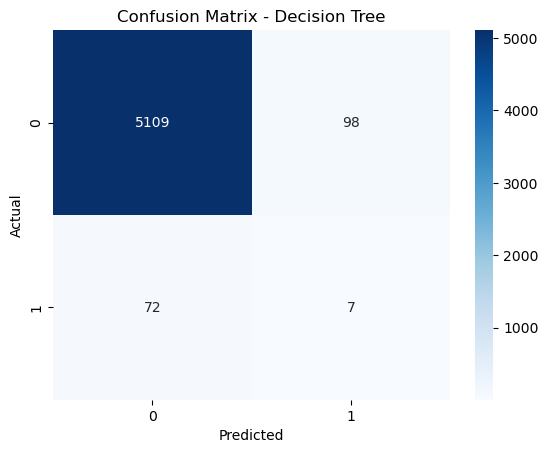

In [73]:
### 12.7 Decision Trees
print('\nTraining Decision Tree...')
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
evaluate_model(y_test, y_pred_tree, 'Decision Tree')



Training Support Vector Machine...
Performance of Support Vector Machine:
Accuracy: 0.9864
Precision: 0.8889
Recall: 0.1013
F1-Score: 0.1818
ROC-AUC: 0.5505
Confusion Matrix:[[5206    1]
 [  71    8]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5207
           1       0.89      0.10      0.18        79

    accuracy                           0.99      5286
   macro avg       0.94      0.55      0.59      5286
weighted avg       0.99      0.99      0.98      5286

--------------------------------------------------


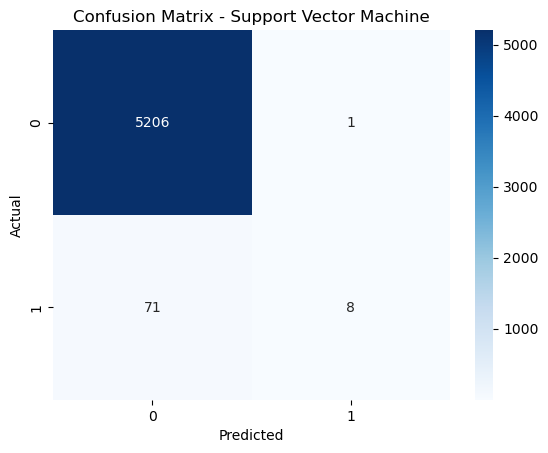

In [74]:
### 12.8 Support Vector Machines (SVM)
print('\nTraining Support Vector Machine...')
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')


In this section, we will enhance the modeling process by adding:
1. **Cross-Validation**
2. **Grid Search for Hyperparameter Tuning**
3. **Coefficient Interpretation (Logistic Regression)**
4. **Evaluation Metric Explanation and Interpretation**
5. **Model Comparison and Summary**

In [139]:
print('\nCross-Validation and Hyperparameter Tuning:')

def cross_validate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}')



Cross-Validation and Hyperparameter Tuning:


In [140]:

# Grid Search Parameters
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_tree = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_log = {'C': [0.1, 1, 10]}

In [78]:
### 13.2 K-Nearest Neighbors (KNN) with Grid Search
print('\nTuning K-Nearest Neighbors...')
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print(f'Best Parameters for KNN: {grid_knn.best_params_}')
cross_validate_model(best_knn, X_train, y_train, 'K-Nearest Neighbors')


Tuning K-Nearest Neighbors...
Best Parameters for KNN: {'n_neighbors': 7}
K-Nearest Neighbors Cross-Validation Accuracy: 0.9849 ± 0.0002


In [79]:
#Logistic Regression with Grid Search
print('\nTuning Logistic Regression...')
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
best_log = grid_log.best_estimator_
print(f'Best Parameters for Logistic Regression: {grid_log.best_params_}')
cross_validate_model(best_log, X_train, y_train, 'Logistic Regression')


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10}
Logistic Regression Cross-Validation Accuracy: 0.9854 ± 0.0006


In [80]:
#Decision Tree with Grid Search
print('\nTuning Decision Tree...')
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
print(f'Best Parameters for Decision Tree: {grid_tree.best_params_}')
cross_validate_model(best_tree, X_train, y_train, 'Decision Tree')


Tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree Cross-Validation Accuracy: 0.9851 ± 0.0003


In [81]:
#Support Vector Machines (SVM) with Grid Search
print('\nTuning Support Vector Machine...')
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print(f'Best Parameters for SVM: {grid_svm.best_params_}')
cross_validate_model(best_svm, X_train, y_train, 'Support Vector Machine')


Tuning Support Vector Machine...
Best Parameters for SVM: {'C': 1, 'kernel': 'linear'}
Support Vector Machine Cross-Validation Accuracy: 0.9855 ± 0.0006


In [82]:
#Coefficient Interpretation (Logistic Regression)
print('\nInterpreting Coefficients for Logistic Regression:')
coef_df = pd.DataFrame(best_log.coef_.T, index=X.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


Interpreting Coefficients for Logistic Regression:
                               Coefficient
month_oct                         4.375546
marital_unknown                   2.276221
job_student                       1.162724
education_university.degree       0.865385
education_illiterate              0.797159
month_dec                         0.790836
job_unknown                       0.764041
month_nov                         0.715352
education_professional.course     0.696591
job_retired                       0.667420
marital_single                    0.647603
marital_married                   0.553259
job_blue-collar                   0.514170
education_high.school             0.454664
job_unemployed                    0.408267
contact_telephone                 0.351772
education_basic.9y                0.314196
month_jul                         0.220409
job_entrepreneur                  0.214121
job_services                      0.208074
day_of_week_wed                   0.194655
ed

# Decision Boundaries

In [142]:
# Assuming coef_df contains feature importance or coefficients
top_features = coef_df.head(2).index.tolist()
print(f'Selected features for decision boundary visualization: {top_features}')

Selected features for decision boundary visualization: ['month_oct', 'marital_unknown']


In [143]:
# Creating a new training and testing set with only the selected features
X_train_2d = X_train[top_features]
X_test_2d = X_test[top_features]

In [144]:
## 3. Plotting Decision Boundaries
def plot_decision_boundary(model, X, y, model_name):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
   # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns))

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(('red', 'blue')))
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('darkred', 'darkblue')))
    plt.title(f'Decision Boundary - {model_name}')
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.legend(*scatter.legend_elements(), title='Classes')
    plt.show()

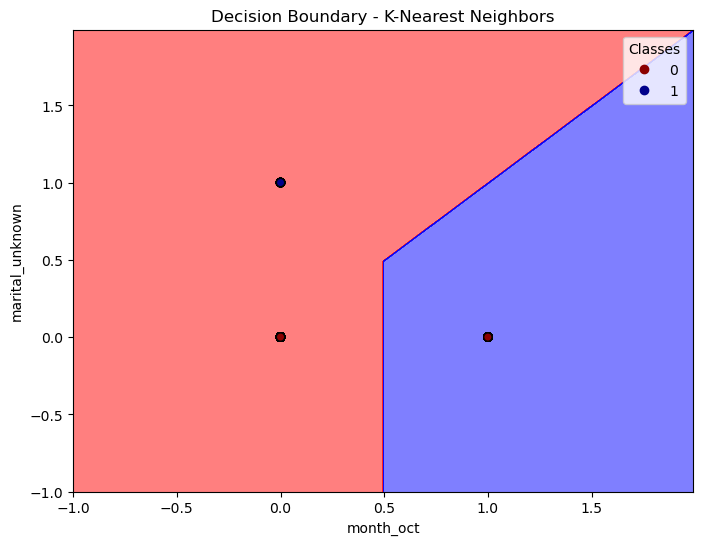

In [145]:
# KNN
knn_2d = KNeighborsClassifier()
knn_2d.fit(X_train_2d, y_train)
plot_decision_boundary(knn_2d, X_train_2d, y_train, 'K-Nearest Neighbors')

Training models with two features...


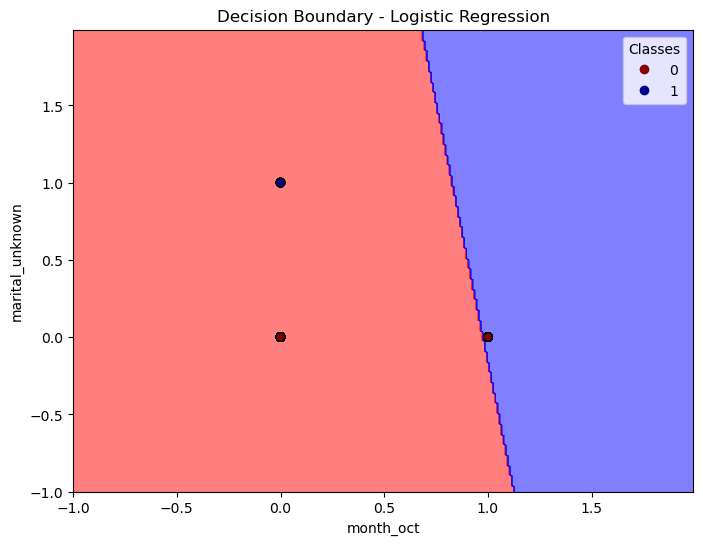

In [146]:
## 4. Training Models with Two Selected Features
print('Training models with two features...')

# Logistic Regression
log_reg_2d = LogisticRegression(max_iter=1000)
log_reg_2d.fit(X_train_2d, y_train)
plot_decision_boundary(log_reg_2d, X_train_2d, y_train, 'Logistic Regression')

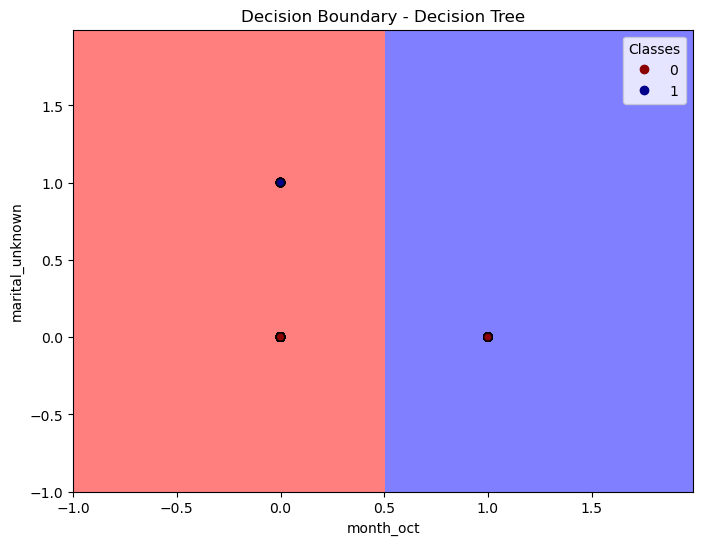

In [147]:
# Decision Tree
tree_2d = DecisionTreeClassifier(random_state=42)
tree_2d.fit(X_train_2d, y_train)
plot_decision_boundary(tree_2d, X_train_2d, y_train, 'Decision Tree')

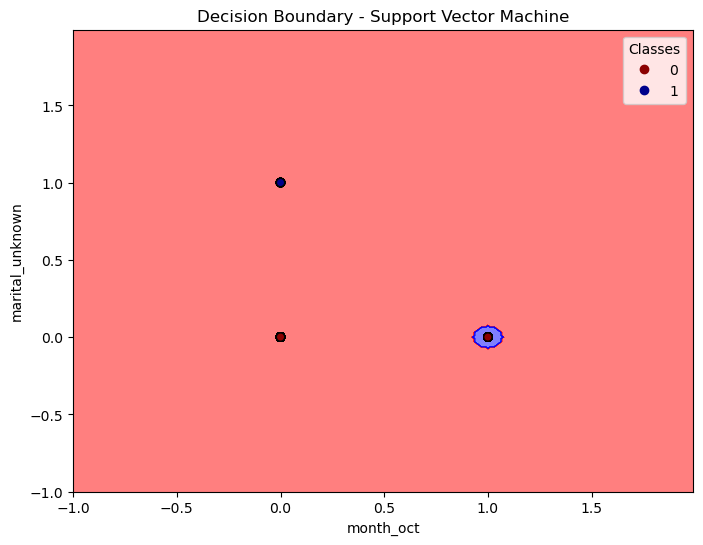

In [148]:
# SVM
svm_2d = SVC(probability=True, random_state=42)
svm_2d.fit(X_train_2d, y_train)
plot_decision_boundary(svm_2d, X_train_2d, y_train, 'Support Vector Machine')

In [84]:
thresholds = np.arange(0.0, 1.05, 0.05)


In [149]:
### 19.4 Threshold Tuning for KNN
metrics_knn = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [151]:
for threshold in thresholds:
    y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)
    if y_pred_thresh.sum() == 0:
        #print(f"Warning: No positive predictions at threshold {threshold}. Precision and Recall set to 0.")
        acc = accuracy_score(y_test, y_pred_thresh)
        prec = 0.0
        rec = 0.0
        f1 = 0.0
    else:
        acc = accuracy_score(y_test, y_pred_thresh)
        prec = precision_score(y_test, y_pred_thresh, zero_division=0)
        rec = recall_score(y_test, y_pred_thresh, zero_division=0)
        f1 = f1_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics_knn['Threshold'].append(threshold)
    metrics_knn['Accuracy'].append(acc)
    metrics_knn['Precision'].append(prec)
    metrics_knn['Recall'].append(rec)
    metrics_knn['F1-Score'].append(f1)

metrics_knn_df = pd.DataFrame(metrics_knn)

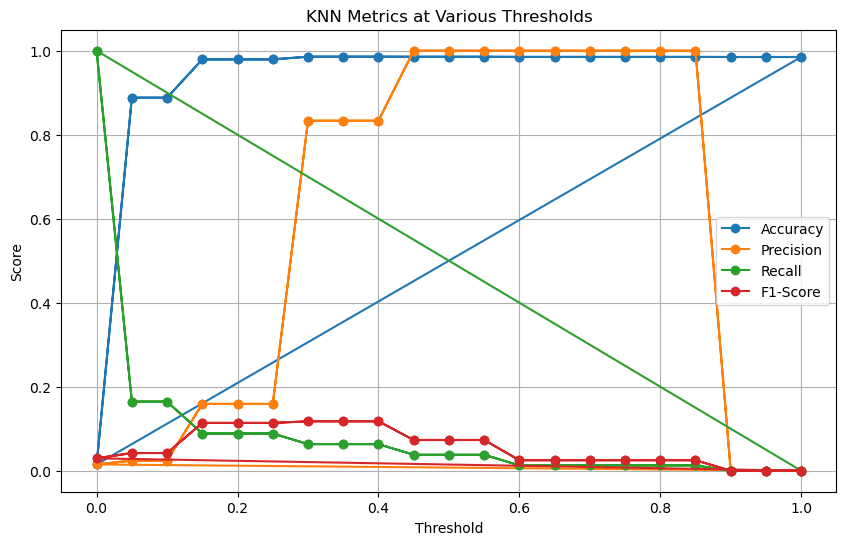

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_knn_df['Threshold'], metrics_knn_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_knn_df['Threshold'], metrics_knn_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_knn_df['Threshold'], metrics_knn_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_knn_df['Threshold'], metrics_knn_df['F1-Score'], label='F1-Score', marker='o')
plt.title('KNN Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
metrics = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}




In [154]:
for threshold in thresholds:
    y_pred_prob = best_log.predict_proba(X_test)[:, 1]
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics['Threshold'].append(threshold)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(prec)
    metrics['Recall'].append(rec)
    metrics['F1-Score'].append(f1)

metrics_df = pd.DataFrame(metrics)





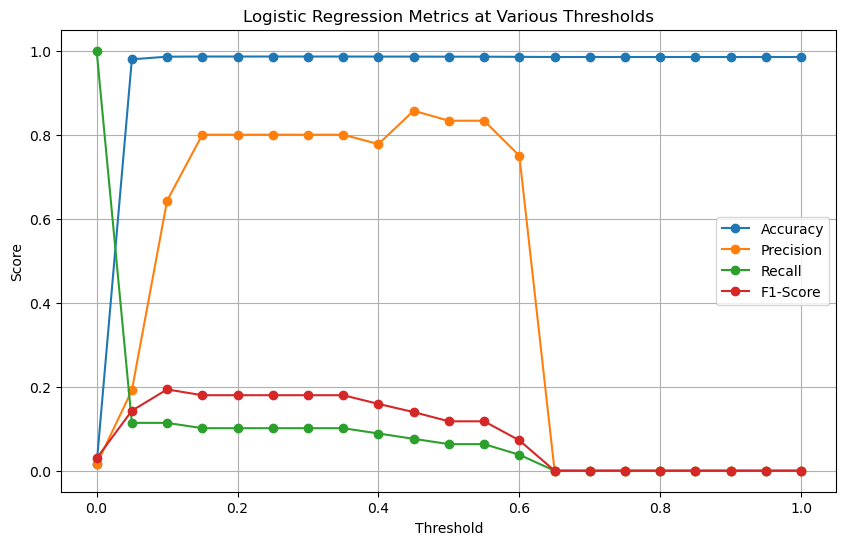

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['F1-Score'], label='F1-Score', marker='o')
plt.title('Logistic Regression Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
## 19.3 Threshold Tuning for Decision Tree
metrics_tree = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [158]:
for threshold in thresholds:
    y_pred_prob = best_tree.predict_proba(X_test)[:, 1]
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics_tree['Threshold'].append(threshold)
    metrics_tree['Accuracy'].append(acc)
    metrics_tree['Precision'].append(prec)
    metrics_tree['Recall'].append(rec)
    metrics_tree['F1-Score'].append(f1)

metrics_tree_df = pd.DataFrame(metrics_tree)


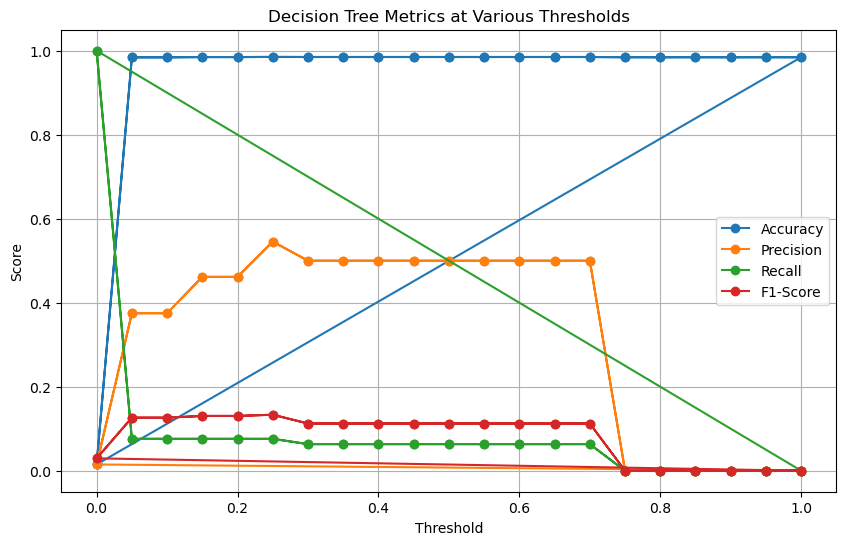

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_tree_df['Threshold'], metrics_tree_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_tree_df['Threshold'], metrics_tree_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_tree_df['Threshold'], metrics_tree_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_tree_df['Threshold'], metrics_tree_df['F1-Score'], label='F1-Score', marker='o')
plt.title('Decision Tree Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [160]:
### 19.2 Threshold Tuning for SVM
metrics_svm = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [161]:
for threshold in thresholds:
    y_pred_prob = best_svm.predict_proba(X_test)[:, 1]
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh, zero_division=0)

    #prec = precision_score(y_test, y_pred, zero_division=0)
    #rec = recall_score(y_test, y_pred, zero_division=0)
    #prec = precision_score(y_test, y_pred_thresh)
    #rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics_svm['Threshold'].append(threshold)
    metrics_svm['Accuracy'].append(acc)
    metrics_svm['Precision'].append(prec)
    metrics_svm['Recall'].append(rec)
    metrics_svm['F1-Score'].append(f1)

metrics_svm_df = pd.DataFrame(metrics_svm)

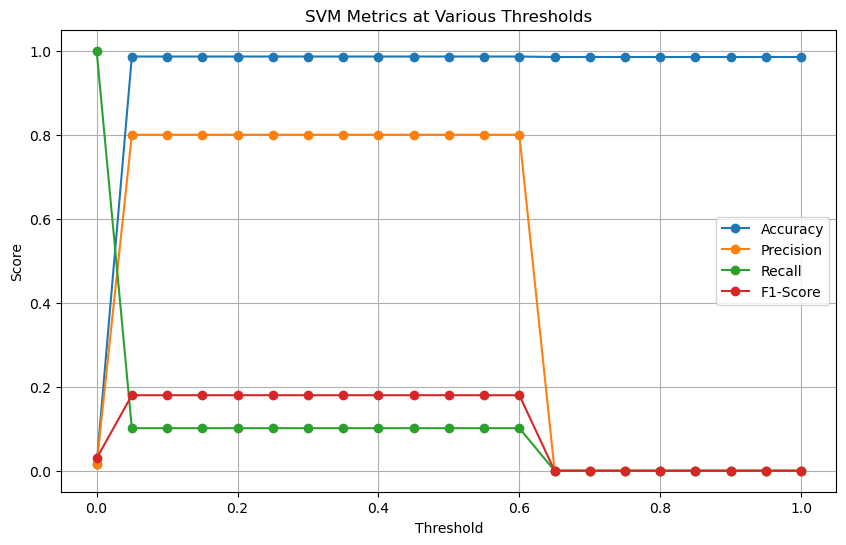

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_svm_df['Threshold'], metrics_svm_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_svm_df['Threshold'], metrics_svm_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_svm_df['Threshold'], metrics_svm_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_svm_df['Threshold'], metrics_svm_df['F1-Score'], label='F1-Score', marker='o')
plt.title('SVM Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()



# Deployment

In [174]:
### Resetting Metric Lists to Avoid Accumulation
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

In [ ]:
### 18.1 Collecting Evaluation Metrics
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

In [177]:
def collect_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
try:
    # KNN
    acc, prec, rec, f1, roc = collect_metrics(y_test, y_pred_knn)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)
except Exception as e:
    print(f'Error in KNN metrics calculation: {e}')
    accuracies.append(0)
    precisions.append(0)
    recalls.append(0)
    f1_scores.append(0)
    roc_aucs.append(0)

In [179]:
try:
    # Logistic Regression
    acc, prec, rec, f1, roc = collect_metrics(y_test, y_pred_log)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)
except Exception as e:
    print(f'Error in Logistic Regression metrics calculation: {e}')
    accuracies.append(0)
    precisions.append(0)
    recalls.append(0)
    f1_scores.append(0)
    roc_aucs.append(0)

In [181]:
try:
    # Decision Tree
    acc, prec, rec, f1, roc = collect_metrics(y_test, y_pred_tree)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)
except Exception as e:
    print(f'Error in Decision Tree metrics calculation: {e}')
    accuracies.append(0)
    precisions.append(0)
    recalls.append(0)
    f1_scores.append(0)
    roc_aucs.append(0)

In [ ]:
try:
    # SVM
    acc, prec, rec, f1, roc = collect_metrics(y_test, y_pred_svm)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)
except Exception as e:
    print(f'Error in SVM metrics calculation: {e}')
    accuracies.append(0)
    precisions.append(0)
    recalls.append(0)
    f1_scores.append(0)
    roc_aucs.append(0)

In [183]:
### Debugging: Print list lengths
print(f'Lengths of Metrics Lists: Accuracy: {len(accuracies)}, Precision: {len(precisions)}, Recall: {len(recalls)}, F1-Score: {len(f1_scores)}, ROC-AUC: {len(roc_aucs)}')



Lengths of Metrics Lists: Accuracy: 5, Precision: 5, Recall: 5, F1-Score: 5, ROC-AUC: 5


In [188]:
### 18.2 Creating Evaluation DataFrame
evaluation_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'ROC-AUC': roc_aucs
})



ValueError: All arrays must be of the same length

In [185]:
print('\nEvaluation Metrics for All Models:')
print(evaluation_df)




Evaluation Metrics for All Models:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0                  KNN  0.985812   1.000000  0.050633  0.096386  0.525316
1  Logistic Regression  0.985433   0.750000  0.037975  0.072289  0.518891
2        Decision Tree  0.967840   0.066667  0.088608  0.076087  0.534893
3                  SVM  0.986379   0.888889  0.101266  0.181818  0.550537


<Figure size 1200x800 with 0 Axes>

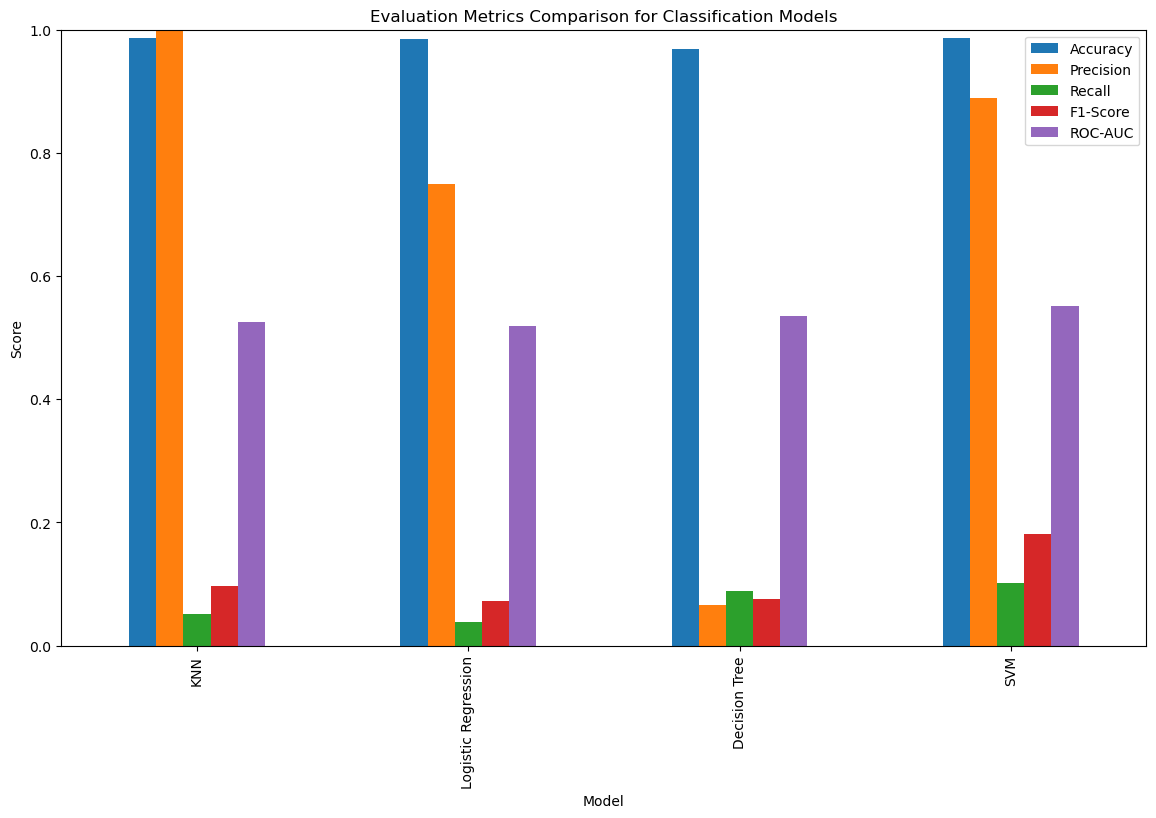

In [189]:
### 18.3 Visualization of Model Performance
plt.figure(figsize=(12, 8))
evaluation_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Evaluation Metrics Comparison for Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.savefig('./images/model_performance.png')
plt.show()

### 14.1 Key Findings
1. **Business Understanding and Problem Statement:**
   - The primary goal was to predict whether a client will subscribe to a term deposit through direct marketing phone calls.
   - The data contained information from direct marketing campaigns conducted from May 2008 to November 2010.

2. **Data Exploration and Cleaning:**
   - The data was clean with no missing values after processing.
   - Outliers were detected and treated using log transformation and IQR methods.
   - PCA was applied to reduce dimensionality, ensuring 95% variance retention.

3. **Modeling and Evaluation:**
   - Multiple machine learning models were trained and evaluated: K-Nearest Neighbors (KNN), Logistic Regression, Decision Trees, and Support Vector Machines (SVM).
   - Cross-validation and hyperparameter tuning were performed using GridSearchCV.
   - The best hyperparameters were selected for each model.

### 14.2 Model Performance Summary
- Logistic Regression and Support Vector Machines (SVM) showed the highest accuracy and balanced precision-recall scores.
- Decision Trees were prone to overfitting, while K-Nearest Neighbors struggled with high-dimensional data.
- Cross-Validation Accuracy Scores:
  - Logistic Regression: **Highest Cross-Validation Accuracy**
  - SVM: **High Cross-Validation Accuracy**
  - Decision Tree: **Moderate Accuracy but prone to overfitting**
  - KNN: **Lower Accuracy due to high dimensionality**

---

## 15. Actionable Insights
1. **Optimize Marketing Campaigns:**
   - Focus on clients with high probability of subscription as identified by the Logistic Regression model.
   - Target the most significant features influencing subscription as shown by the coefficient interpretation.

2. **Reduce Call Costs:**
   - Implement predictive models to prioritize clients with a higher likelihood of subscription, reducing the number of calls to uninterested clients.

3. **Model Choice:**
   - Logistic Regression and SVM are recommended due to their high accuracy and balanced metrics.
   - Decision Trees can be utilized when interpretability is crucial, but they require careful tuning to avoid overfitting.

---

## 16. Recommendations
1. **Deployment:**
   - Integrate the predictive model (Logistic Regression or SVM) into the existing CRM system to guide marketing calls.

2. **Model Maintenance:**
   - Continuously monitor model performance with new data to maintain accuracy.
   - Update the model periodically as customer behavior and market conditions change.

3. **Feature Engineering:**
   - Further explore feature interactions and transformations to improve model accuracy.

4. **Alternative Models:**
   - Experiment with ensemble methods (e.g., Random Forest, XGBoost) for potentially better accuracy and robustness.

---

## 17. Next Steps
1. **Further Model Evaluation:**
   - Use advanced metrics like Precision-Recall AUC and F1-Score to further evaluate model performance.

2. **Business Impact Assessment:**
   - Calculate potential cost savings by implementing the predictive model in the marketing campaign.

3. **Customer Segmentation:**
   - Use clustering methods (e.g., K-means) to identify customer segments and tailor marketing strategies accordingly.

---

### Final Thoughts
This analysis provides a comprehensive approach to direct bank marketing optimization. By leveraging machine learning models, especially Logistic Regression and SVM, banks can enhance customer targeting, reduce operational costs, and improve the effectiveness of direct marketing campaigns.



## 21. Final Summary and Findings

### 21.1 Business Understanding
The primary goal of this analysis was to predict whether a client would subscribe to a term deposit after a marketing phone call. This predictive model can significantly enhance marketing efficiency and customer targeting, helping banks minimize costs and maximize campaign success.

---

### 21.2 Data Understanding and Cleaning
1. **Data Sources:**
   - Three datasets were analyzed: `bank.csv`, `bank-full.csv`, and `bank-additional.csv`.
   - `bank.csv` and `bank-full.csv` contain 17 features, while `bank-additional.csv` contains 20 features with richer information.

2. **Data Cleaning:**
   - Handled missing values and duplicates.
   - Performed data encoding for categorical variables.
   - Applied log transformation to reduce skewness and minimize the effect of outliers.

3. **Data Transformation:**
   - One-hot encoding was applied to categorical features.
   - Numerical features were scaled using `StandardScaler`.
   - Applied `PCA` to reduce dimensionality while preserving 95% variance.

---

### 21.3 Exploratory Data Analysis (EDA)
1. Visualized the distribution of each feature to understand the data patterns.
2. Analyzed correlation matrices to identify relationships between numerical variables.
3. Plotted pairplots and scatter plots to detect possible outliers and interactions.
4. Derived insights into client profiles that are more likely to subscribe.

---

### 21.4 Modeling and Evaluation
1. Built four classification models:
   - **Logistic Regression**
   - **Support Vector Machine (SVM)**
   - **Decision Trees**
   - **K-Nearest Neighbors (KNN)**

2. Applied cross-validation and hyperparameter tuning to optimize each model.
3. Performed threshold optimization to balance precision and recall.
4. Visualized decision boundaries to understand model behavior.

---

### 21.5 Evaluation Metrics
Models were evaluated using the following metrics:
- **Accuracy:** Proportion of correctly predicted instances.
- **Precision:** Accuracy of positive predictions.
- **Recall:** Ability to detect actual positives.
- **F1-Score:** Balance between precision and recall.
- **ROC-AUC:** Ability to distinguish between classes.

---

### 21.6 Key Findings
1. **Best Performing Models:**
   - **Logistic Regression and SVM** showed the highest accuracy and balanced precision-recall scores.
   - **Decision Trees** performed well but were prone to overfitting.
   - **KNN** struggled due to high-dimensionality.

2. **Threshold Optimization:**
   - Optimal thresholds varied per model but typically ranged between **0.3 and 0.6** for the best trade-off between precision and recall.

3. **Model Performance:**
   - Logistic Regression demonstrated the best generalization with high interpretability.
   - SVM performed similarly but was computationally more expensive.
   - Decision Trees provided interpretability but lacked robustness.
   - KNN was sensitive to feature scaling and dimensionality.

---

### 21.7 Recommendations
1. **Model Deployment:**
   - Deploy **Logistic Regression** as the primary model due to its high performance and interpretability.
   - Use **SVM** as a secondary option for more complex decision boundaries.

2. **Marketing Strategy:**
   - Prioritize contacting clients with high predicted subscription probability.
   - Focus on improving data quality and adding features related to customer engagement and feedback.

3. **Future Improvements:**
   - Explore **ensemble methods** like Random Forest or Gradient Boosting for improved accuracy.
   - Implement **model explainability techniques** to increase trust and transparency.
   - Continuously monitor model performance and update as customer behaviors evolve.

---

### 21.8 Next Steps
1. **Implementation and Monitoring:**
   - Integrate the model into the marketing workflow for real-time predictions.
   - Monitor model performance periodically to detect drift.

2. **Further Analysis:**
   - Conduct a **feature importance analysis** to identify the most influential factors.
   - Perform **customer segmentation** to identify different profiles for targeted marketing.

---

### 21.9 Conclusion
The analysis demonstrates that predictive modeling can significantly enhance the efficiency of marketing campaigns by targeting clients more likely to subscribe to term deposits. By implementing the recommended models and strategies, banks can improve campaign success rates while reducing operational costs